# Project Name: Micro Credit Model

# Predicting in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan using machine learning


This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether the customer will be paying back the loaned amount within 5 days of insurance of loan in time or not.

1. **Problem Definition**

In a statement,
The problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

2. **Data**

All of the dataset values were provided by a client.


3. **Evaluation**

Evaluating a models predictions using problem-specific evaluation metrics


4. **Features**

The following are the features we'll use to predict our target variable (Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter).

* label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
* msisdn : mobile number of user
* aon : age on cellular network in days
* daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
* daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
* rental30: Average main account balance over last 30 days
* rental90: Average main account balance over last 90 days
* last_rech_date_ma: Number of days till last recharge of main account
* last_rech_date_da: Number of days till last recharge of data account
* last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)
* cnt_ma_rech30: Number of times main account got recharged in last 30 days
* fr_ma_rech30: Frequency of main account recharged in last 30 days
* sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
* medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
* medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
* cnt_ma_rech90: Number of times main account got recharged in last 90 days
* fr_ma_rech90: Frequency of main account recharged in last 90 days
* sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indian Rupee)
* medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)
* medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)
* cnt_da_rech30: Number of times data account got recharged in last 30 days
* fr_da_rech30: Frequency of data account recharged in last 30 days
* cnt_da_rech90: Number of times data account got recharged in last 90 days
* fr_da_rech90: Frequency of data account recharged in last 90 days
* cnt_loans30: Number of loans taken by user in last 30 days
* amnt_loans30: Total amount of loans taken by user in last 30 days
* maxamnt_loans30: maximum amount of loan taken by the user in last 30 days
* medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days
* cnt_loans90: Number of loans taken by user in last 90 days
* amnt_loans90: Total amount of loans taken by user in last 90 days
* maxamnt_loans90: maximum amount of loan taken by the user in last 90 days
* medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
* payback30: Average payback time in days over last 30 days
* payback90: Average payback time in days over last 90 days
* pcircle: telecom circle
* pdate: date


In [2]:
# Importing libraries for data loading and visualization..
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk import flatten

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the dataset..
df_credit=pd.read_csv("Data file.csv",parse_dates=['pdate'],index_col=None)
df_credit

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-10-08
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-12-06
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [5]:
# checking the features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df_credit.columns)
shape=df_credit.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df_credit.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df_credit.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df_credit.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df_credit.columns.values:
    print("Number of unique values of {} : {}".format(col, df_credit[col].nunique()))
    
print ('\nCreditor and defaulter counts','\n',df_credit.label.value_counts())


Features Present in the Dataset: 
 Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Total Number of Rows :  209593
Total Number of Features :  37


Data Types of Features :
 Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_

In [6]:
# Checking Statistical Informations...
df_credit.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


**Some features even have negative values like the age on cellular network, main account last recharge date, data account last recharge date. Negative values in these features make no sense thus these values should be removed(Shown in EDA section).** 

In [7]:
# Dropping those features which are not adding any important information...
df_credit.drop(['Unnamed: 0','pcircle','msisdn'],axis=1,inplace=True)
df_credit

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-10-08
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-12-06
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


# EDA (Exploratory data Analysis)


In [8]:
# Checking for negative values in the Dataset, as we can see that many of the features are having negative values...
(df_credit.drop(['pdate'],axis=1) >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

**Some of the features like "rental30" and "rental90" can have negative values as these feature will show the loan amount per user.**



In [9]:
# Dropping few features...
df_credit.drop(['rental30','rental90','pdate'],axis=1,inplace=True)

In [10]:
# This loop will drop all the negative values from those features in which they are not needed...
index=[]
for cols in df_credit.columns.values:
    Index_1=df_credit[df_credit[f'{cols}'] < 0].index.values
    Index_2=Index_1.tolist()
    index.append(Index_2)
index_fl=flatten(index)
set(index_fl)
len(index_fl)

9922

In [11]:
# Dropping the negative values in the features where these negative values don't make any sense...
df_credit.drop(index_fl,inplace=True)

In [12]:
# Checking if the negative value dropping process is succesful or not..
(df_credit >= 0).all(0)

label                   True
aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [13]:
# Checking some rows where negative values were present, as we can see there are no negative values..
df_credit[20:30]

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
20,1,100.0,769.614000,777.460000,6.0,0.0,770,5,20.0,8867.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
21,0,378.0,514.693333,515.200000,2.0,0.0,773,1,0.0,773.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000,0.000000
22,1,463.0,1540.000000,1541.000000,4.0,0.0,770,1,0.0,770.0,...,1,6,6.0,0.0,2.0,12,6,0.0,0.000,42.000000
23,1,857.0,58.023333,58.023333,2.0,0.0,1539,4,12.0,6164.0,...,4,24,6.0,0.0,4.0,24,6,0.0,6.000,6.000000
24,0,966.0,291.563333,291.563333,0.0,0.0,0,0,0.0,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
25,1,656.0,63.250000,63.250000,1.0,0.0,770,15,1.0,12674.0,...,5,30,6.0,0.0,5.0,30,6,0.0,1.800,1.800000
26,1,1179.0,3703.272000,3712.840000,2.0,0.0,770,6,5.0,5395.0,...,4,24,6.0,0.0,5.0,30,6,0.0,6.000,6.000000
27,0,871.0,505.600000,508.000000,16.0,0.0,770,1,0.0,770.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
28,1,1610.0,6688.559333,6705.260000,1.0,0.0,4048,9,1.0,32149.0,...,8,48,6.0,0.0,8.0,48,6,0.0,1.375,1.666667
29,1,67.0,16.166667,16.166667,3.0,0.0,1539,2,12.0,3086.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000


In [14]:
# reading dataset...
df_credit_new=pd.read_csv("Data file.csv",parse_dates=['pdate'],index_col=None)

In [15]:
# Now placing the dropped "rental30" and "rental90" values in which the negative values are not outliers...
df_credit['rental30']=df_credit_new['rental30']
df_credit['rental90']=df_credit_new['rental90']
df_credit['pdate']=df_credit_new['pdate']

In [16]:
# Displaying few rows for checking whether the insertion is succesful or not..
df_credit[20:30]

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,pdate
20,1,100.0,769.614000,777.460000,6.0,0.0,770,5,20.0,8867.0,...,0.0,1.0,6,6,0.0,0.000,0.000000,1050.57,1167.30,2016-03-07
21,0,378.0,514.693333,515.200000,2.0,0.0,773,1,0.0,773.0,...,0.0,2.0,12,6,0.0,0.000,0.000000,56.26,58.20,2016-01-07
22,1,463.0,1540.000000,1541.000000,4.0,0.0,770,1,0.0,770.0,...,0.0,2.0,12,6,0.0,0.000,42.000000,969.12,969.12,2016-08-08
23,1,857.0,58.023333,58.023333,2.0,0.0,1539,4,12.0,6164.0,...,0.0,4.0,24,6,0.0,6.000,6.000000,479.44,479.44,2016-06-26
24,0,966.0,291.563333,291.563333,0.0,0.0,0,0,0.0,0.0,...,0.0,1.0,6,6,0.0,0.000,0.000000,-2020.09,-2020.09,2016-06-23
25,1,656.0,63.250000,63.250000,1.0,0.0,770,15,1.0,12674.0,...,0.0,5.0,30,6,0.0,1.800,1.800000,2855.70,2855.70,2016-06-15
26,1,1179.0,3703.272000,3712.840000,2.0,0.0,770,6,5.0,5395.0,...,0.0,5.0,30,6,0.0,6.000,6.000000,340.96,376.42,2016-06-07
27,0,871.0,505.600000,508.000000,16.0,0.0,770,1,0.0,770.0,...,0.0,1.0,6,6,0.0,0.000,0.000000,9276.68,10569.17,2016-09-07
28,1,1610.0,6688.559333,6705.260000,1.0,0.0,4048,9,1.0,32149.0,...,0.0,8.0,48,6,0.0,1.375,1.666667,3553.83,3653.05,2016-02-07
29,1,67.0,16.166667,16.166667,3.0,0.0,1539,2,12.0,3086.0,...,0.0,1.0,6,6,0.0,0.000,0.000000,962.60,962.60,2016-10-06


In [17]:
# Checking the correlation between the features and the label...
df_credit.corr()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
label,1.000000,-0.003257,0.161804,0.160075,0.003291,0.000777,0.120954,0.226554,0.000269,1.935857e-01,...,0.000591,0.041934,0.005160,0.192480,0.080027,0.033279,0.042385,0.042864,0.053048,0.070185
aon,-0.003257,1.000000,0.000969,0.000218,0.001826,-0.001632,0.003507,-0.003179,-0.001087,4.208767e-04,...,-0.002675,0.005314,-0.000893,-0.002683,-0.001383,0.003436,0.002303,0.002546,-0.000946,-0.000880
daily_decr30,0.161804,0.000969,1.000000,0.977540,-0.000091,-0.002064,0.275021,0.446659,-0.000877,6.345488e-01,...,0.000184,-0.012161,0.008838,0.559284,0.398443,-0.037608,0.023488,0.043461,0.441569,0.457884
daily_decr90,0.160075,0.000218,0.977540,1.000000,0.000346,-0.002327,0.263310,0.421963,-0.000623,6.017200e-01,...,0.000193,-0.006041,0.009320,0.563157,0.395467,-0.034942,0.016062,0.037270,0.434178,0.470832
last_rech_date_ma,0.003291,0.001826,-0.000091,0.000346,1.000000,0.001871,-0.000335,0.003927,-0.001615,1.662917e-03,...,0.001046,0.001615,-0.000139,0.000421,-0.001415,0.002580,-0.002574,-0.002084,-0.001351,-0.002128
last_rech_date_da,0.000777,-0.001632,-0.002064,-0.002327,0.001871,1.000000,0.000086,0.001216,0.001232,-2.057615e-04,...,0.000031,-0.001007,-0.000903,-0.000035,0.001165,-0.003441,-0.000111,0.000304,0.003119,0.002617
last_rech_amt_ma,0.120954,0.003507,0.275021,0.263310,-0.000335,0.000086,1.000000,-0.009934,0.002783,4.375519e-01,...,0.000788,0.027880,0.000020,0.008395,0.147631,0.020702,-0.031179,-0.018116,0.125913,0.119665
cnt_ma_rech30,0.226554,-0.003179,0.446659,0.421963,0.003927,0.001216,-0.009934,1.000000,0.001209,6.540828e-01,...,0.000337,-0.069021,0.014483,0.682555,0.170374,-0.073029,0.038880,0.011622,0.230352,0.226592
fr_ma_rech30,0.000269,-0.001087,-0.000877,-0.000623,-0.001615,0.001232,0.002783,0.001209,1.000000,3.948041e-04,...,-0.001031,-0.000534,0.003557,0.002458,-0.001883,-0.001517,0.000837,0.000487,-0.001688,-0.000975
sumamnt_ma_rech30,0.193586,0.000421,0.634549,0.601720,0.001663,-0.000206,0.437552,0.654083,0.000395,1.000000e+00,...,0.001732,-0.035825,0.009307,0.480385,0.255176,-0.043106,-0.004216,-0.017576,0.270852,0.257157


# Univariant Plot Analysis


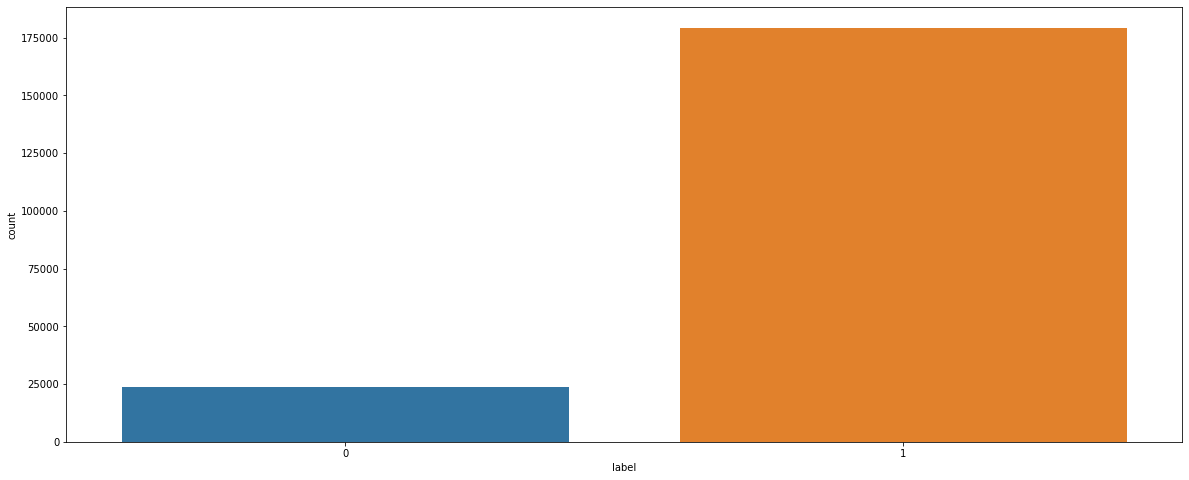

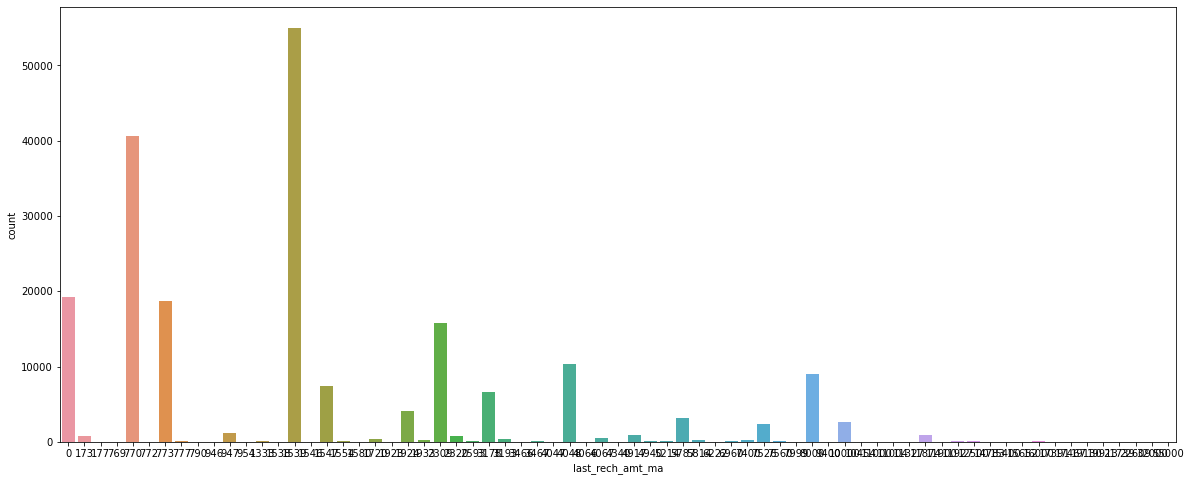

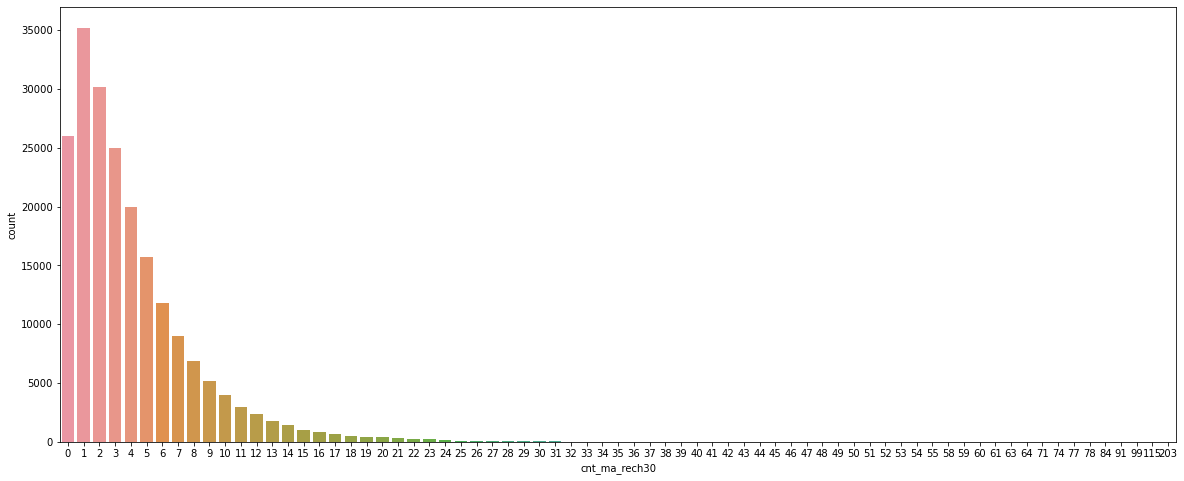

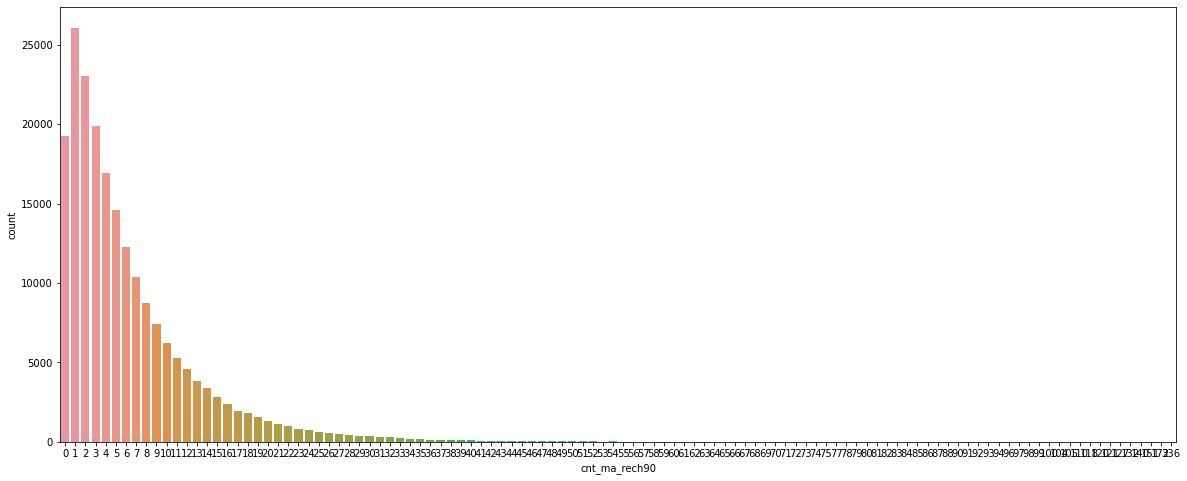

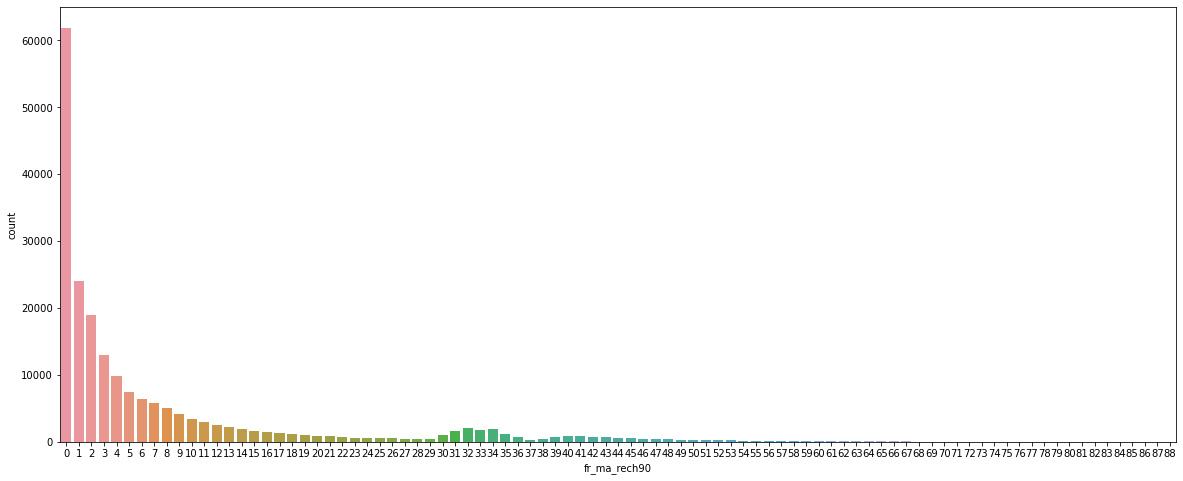

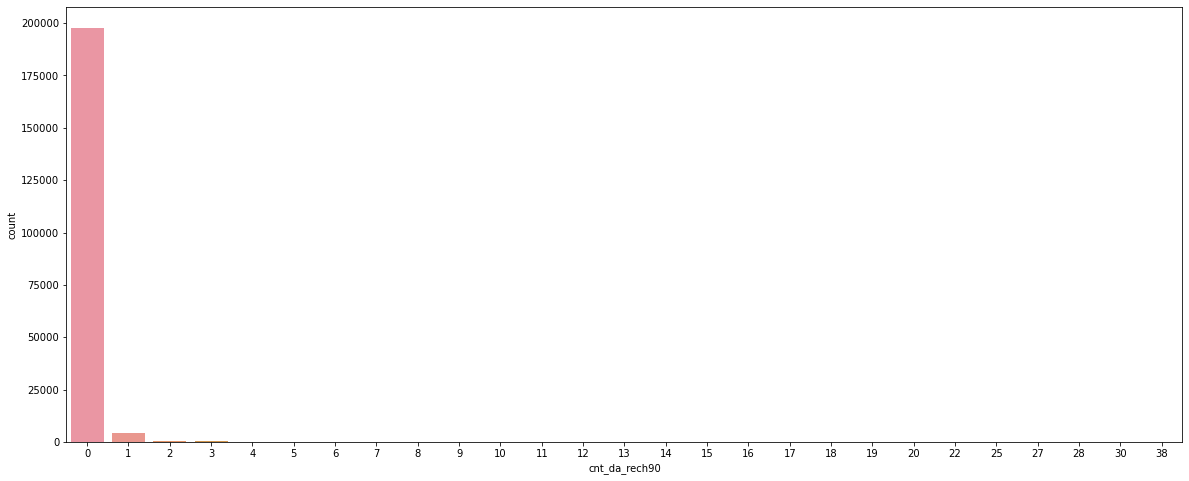

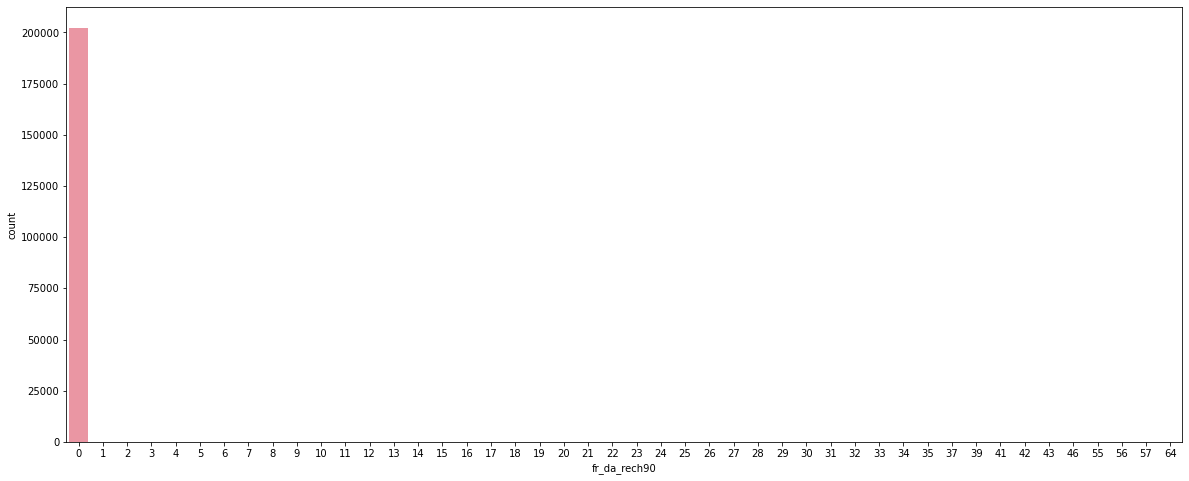

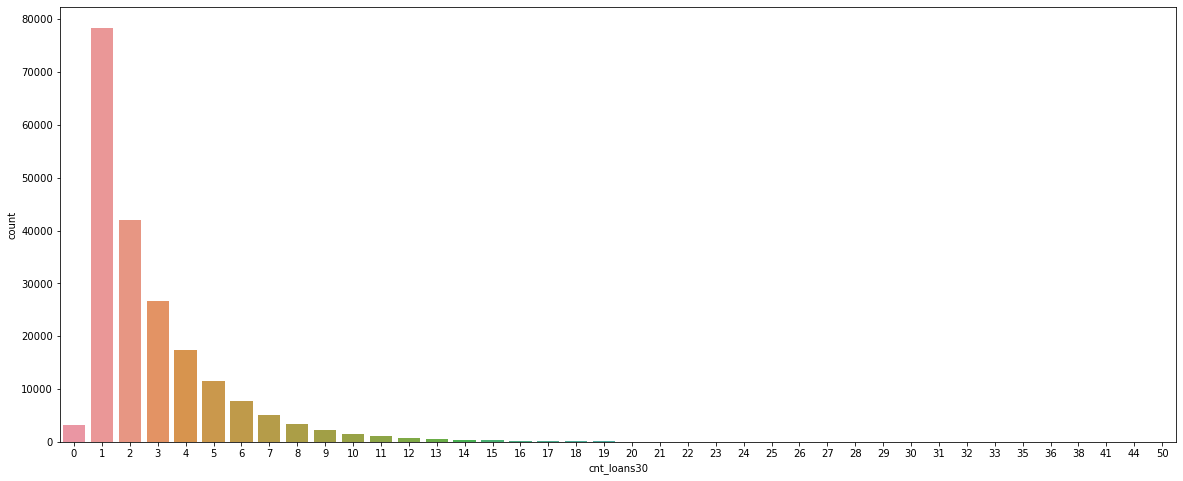

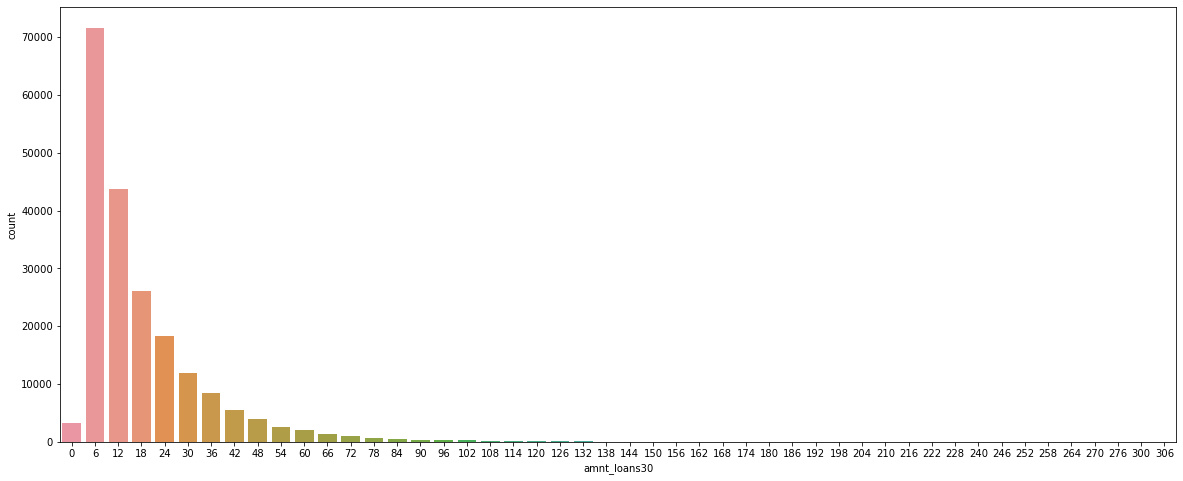

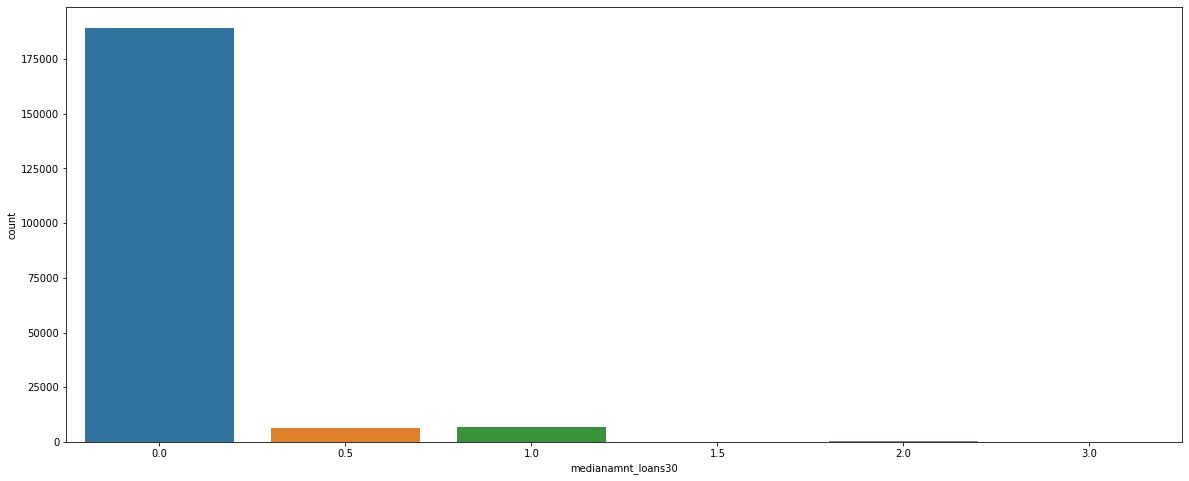

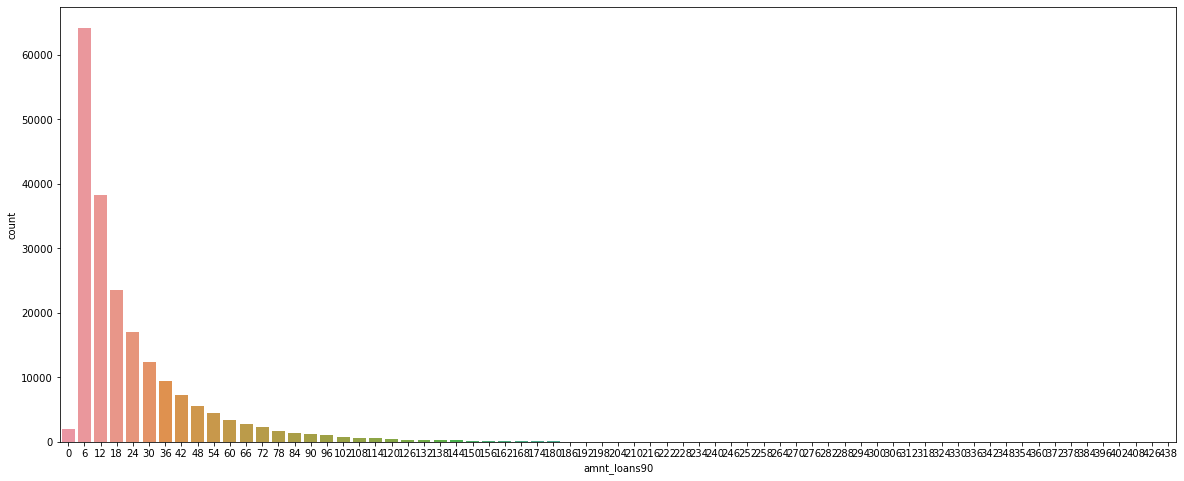

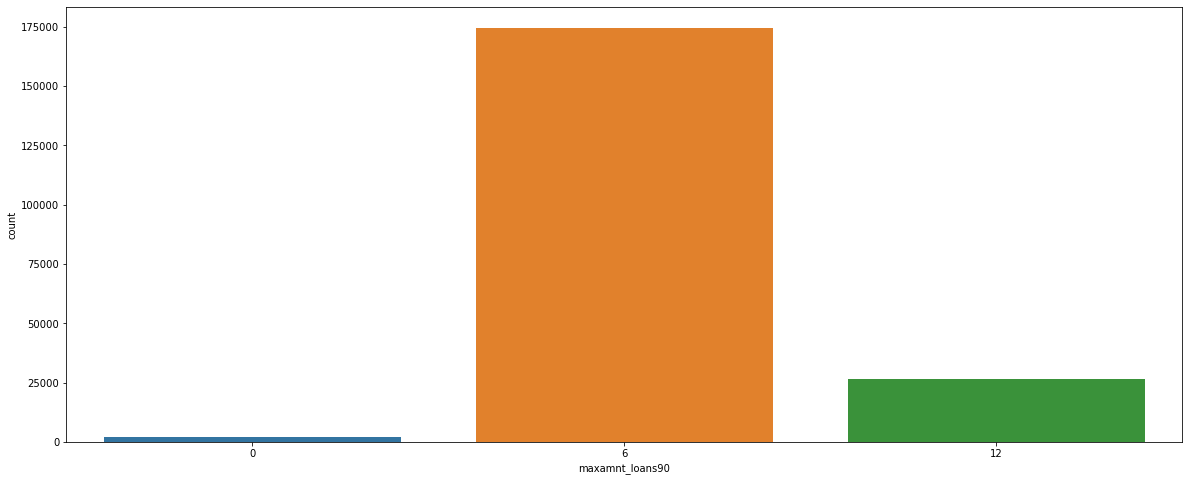

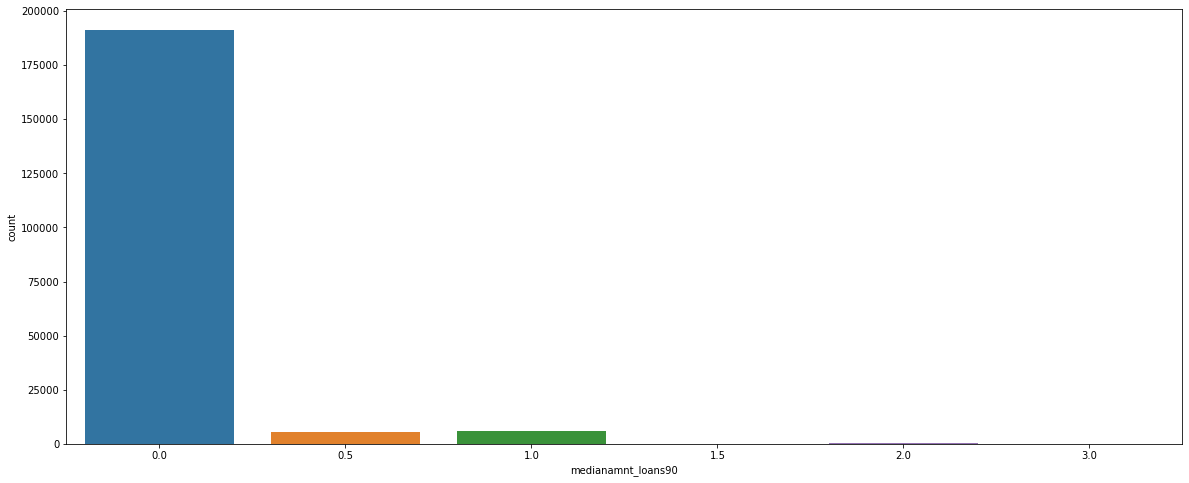

In [18]:
# For loop to display some important features counts in one go...
list=['label', 'last_rech_amt_ma', 'cnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30',
      'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]
for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_credit)
    plt.show()

label                      AxesSubplot(0.125,0.826831;0.227941x0.053169)
aon                     AxesSubplot(0.398529,0.826831;0.227941x0.053169)
daily_decr30            AxesSubplot(0.672059,0.826831;0.227941x0.053169)
daily_decr90               AxesSubplot(0.125,0.763028;0.227941x0.053169)
last_rech_date_ma       AxesSubplot(0.398529,0.763028;0.227941x0.053169)
last_rech_date_da       AxesSubplot(0.672059,0.763028;0.227941x0.053169)
last_rech_amt_ma           AxesSubplot(0.125,0.699225;0.227941x0.053169)
cnt_ma_rech30           AxesSubplot(0.398529,0.699225;0.227941x0.053169)
fr_ma_rech30            AxesSubplot(0.672059,0.699225;0.227941x0.053169)
sumamnt_ma_rech30          AxesSubplot(0.125,0.635423;0.227941x0.053169)
medianamnt_ma_rech30    AxesSubplot(0.398529,0.635423;0.227941x0.053169)
medianmarechprebal30    AxesSubplot(0.672059,0.635423;0.227941x0.053169)
cnt_ma_rech90               AxesSubplot(0.125,0.57162;0.227941x0.053169)
fr_ma_rech90             AxesSubplot(0.398529,0.571

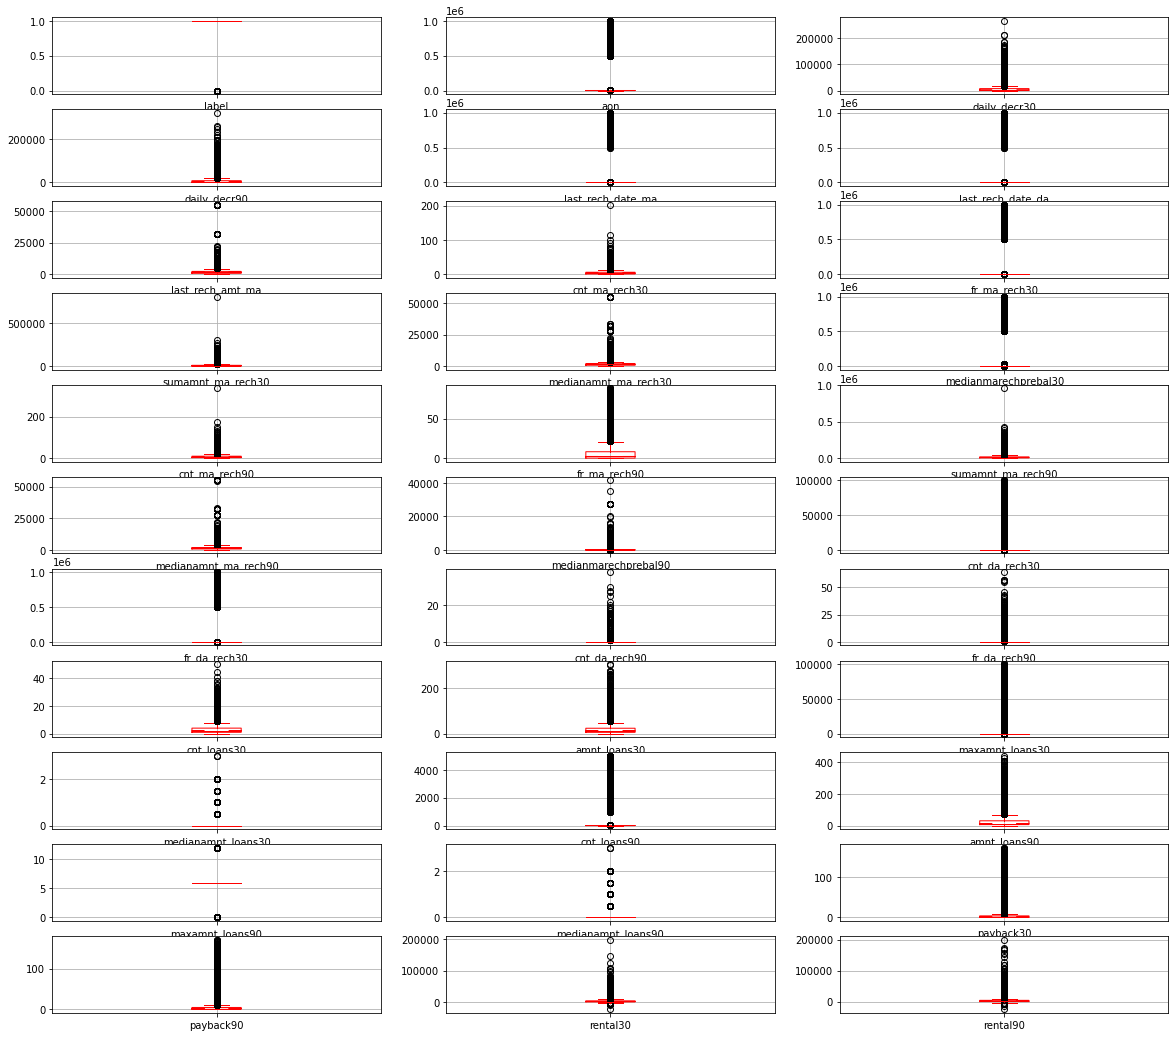

In [19]:
# Plotting the boxplot in order to check few statistical values and outliers
df_credit.drop('pdate',axis=1).plot(kind='box', subplots=True, layout=(12,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

As we can see that except the negative values there are still lot of outliers present.



array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>],
       [<AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>],
       [<AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianmarechprebal90'}>,
        <AxesSubplot:

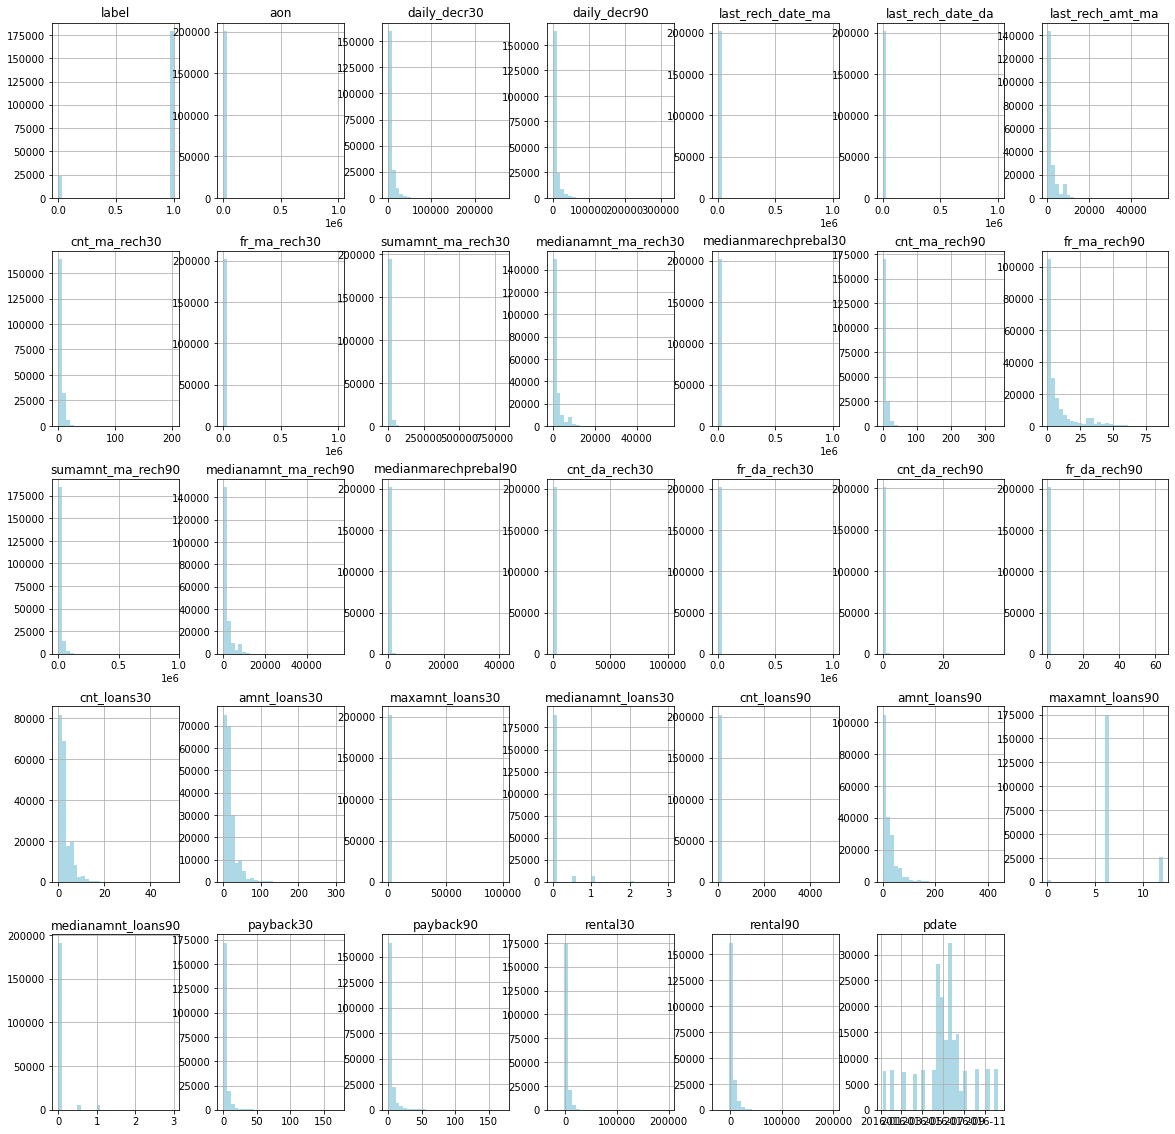

In [20]:
# Checking the Distribution using the histogram plot.
df_credit.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='lightblue')

**From the above histogram plots, it is clear that the data is rightly skewed...



In [21]:
# Dropping the date feature to proceed further for outliers removing part...
df_credit.drop('pdate',axis=1,inplace=True)

In [22]:
# Checking correlation among the features...
df_credit.corr()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
label,1.000000,-0.003257,0.161804,0.160075,0.003291,0.000777,0.120954,0.226554,0.000269,1.935857e-01,...,0.000591,0.041934,0.005160,0.192480,0.080027,0.033279,0.042385,0.042864,0.053048,0.070185
aon,-0.003257,1.000000,0.000969,0.000218,0.001826,-0.001632,0.003507,-0.003179,-0.001087,4.208767e-04,...,-0.002675,0.005314,-0.000893,-0.002683,-0.001383,0.003436,0.002303,0.002546,-0.000946,-0.000880
daily_decr30,0.161804,0.000969,1.000000,0.977540,-0.000091,-0.002064,0.275021,0.446659,-0.000877,6.345488e-01,...,0.000184,-0.012161,0.008838,0.559284,0.398443,-0.037608,0.023488,0.043461,0.441569,0.457884
daily_decr90,0.160075,0.000218,0.977540,1.000000,0.000346,-0.002327,0.263310,0.421963,-0.000623,6.017200e-01,...,0.000193,-0.006041,0.009320,0.563157,0.395467,-0.034942,0.016062,0.037270,0.434178,0.470832
last_rech_date_ma,0.003291,0.001826,-0.000091,0.000346,1.000000,0.001871,-0.000335,0.003927,-0.001615,1.662917e-03,...,0.001046,0.001615,-0.000139,0.000421,-0.001415,0.002580,-0.002574,-0.002084,-0.001351,-0.002128
last_rech_date_da,0.000777,-0.001632,-0.002064,-0.002327,0.001871,1.000000,0.000086,0.001216,0.001232,-2.057615e-04,...,0.000031,-0.001007,-0.000903,-0.000035,0.001165,-0.003441,-0.000111,0.000304,0.003119,0.002617
last_rech_amt_ma,0.120954,0.003507,0.275021,0.263310,-0.000335,0.000086,1.000000,-0.009934,0.002783,4.375519e-01,...,0.000788,0.027880,0.000020,0.008395,0.147631,0.020702,-0.031179,-0.018116,0.125913,0.119665
cnt_ma_rech30,0.226554,-0.003179,0.446659,0.421963,0.003927,0.001216,-0.009934,1.000000,0.001209,6.540828e-01,...,0.000337,-0.069021,0.014483,0.682555,0.170374,-0.073029,0.038880,0.011622,0.230352,0.226592
fr_ma_rech30,0.000269,-0.001087,-0.000877,-0.000623,-0.001615,0.001232,0.002783,0.001209,1.000000,3.948041e-04,...,-0.001031,-0.000534,0.003557,0.002458,-0.001883,-0.001517,0.000837,0.000487,-0.001688,-0.000975
sumamnt_ma_rech30,0.193586,0.000421,0.634549,0.601720,0.001663,-0.000206,0.437552,0.654083,0.000395,1.000000e+00,...,0.001732,-0.035825,0.009307,0.480385,0.255176,-0.043106,-0.004216,-0.017576,0.270852,0.257157


# Note:-

**The Dataset we are having, consists of some features giving information anout the user for the time span of 30 days and 90 days. According to me if we have data of large number of days for a particular user then we could interpret User's behavior more precisely because many users have the tendancy of repeating the same things. Thus the features having the data with a time span of 90 days gives more information about the user as compared to the features with a time span of 30 days.**

**From the above correlation table it is also clear that the features with time span of 30 and 90 days almost hav ethe same correlation thus we can drop one for the same information.**

In [24]:
# Now dropping the features having same correlation...
df_credit.drop(["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30"],axis=1,inplace=True)

In [25]:
# Checking the dataframe after dropping...
df_credit

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,0,272.0,3065.150000,2.0,0.0,1539,1539.0,7.50,2,21,...,0,0,2,6.0,2.0,12,6,0.0,29.000000,260.13
1,1,712.0,12124.750000,20.0,0.0,5787,5787.0,61.04,1,0,...,0,0,1,12.0,1.0,12,12,0.0,0.000000,3691.26
2,1,535.0,1398.000000,3.0,0.0,1539,1539.0,66.32,1,0,...,0,0,1,6.0,1.0,6,6,0.0,0.000000,900.13
3,1,241.0,21.228000,41.0,0.0,947,0.0,0.00,1,0,...,0,0,2,6.0,2.0,12,6,0.0,0.000000,159.42
4,1,947.0,150.619333,4.0,0.0,2309,2309.0,29.00,8,2,...,0,0,7,6.0,7.0,42,6,0.0,2.333333,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1.0,0.0,4048,3178.0,91.81,3,2,...,0,0,2,6.0,2.0,12,6,0.0,1.000000,1089.19
209589,1,1075.0,36.936000,4.0,0.0,773,773.0,161.30,6,2,...,0,0,3,6.0,3.0,18,6,0.0,1.000000,1728.36
209590,1,1013.0,11904.350000,3.0,0.0,1539,1539.0,51.13,11,5,...,0,0,4,12.0,6.0,54,12,0.0,3.833333,8893.20
209591,1,1732.0,12574.370000,2.0,38.0,773,773.0,164.00,6,4,...,1,0,2,12.0,3.0,24,12,0.0,10.500000,984.58


**Using MS EXCEL I have found the maximum values a feature can have, beyond these values the values are unimaginable.**

**(for an example beyond the value [2500], the very next value in "aon" feature comes out to be around 2379 years, which means a user is using the telephone services from 359 BCE which is clearly not possible).**

In [27]:
#************** Threshold Values that some of the important feature can have according to the data provided ***********

# 1) rental30 and rental90 can be negative 
# 2) last_rech_date_ma                    ==> max 113
# 3) last_rech_date_da                    ==> max 115
# 4) aon                                  ==> less than 2500  
# 5) fr_ma_rech30                         ==> less than 38
# 6) maxamnt_loans30                      ==> less than 12
# 7) cnt_loans90                          ==> less than 71

In [28]:
# Removing outliers from features...
df_clean = df_credit[df_credit['last_rech_date_ma'] < 250]  
df_clean = df_clean[df_clean['last_rech_date_da'] <= 115]
df_clean = df_clean[df_clean['aon'] < 2500]
df_clean = df_clean[df_clean['cnt_loans90'] <= 71]
df_clean = df_clean[df_clean['maxamnt_loans30'] <= 12]

In [29]:
# Checking the clean dataset...
df_clean

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,0,272.0,3065.150000,2.0,0.0,1539,1539.0,7.50,2,21,...,0,0,2,6.0,2.0,12,6,0.0,29.000000,260.13
1,1,712.0,12124.750000,20.0,0.0,5787,5787.0,61.04,1,0,...,0,0,1,12.0,1.0,12,12,0.0,0.000000,3691.26
2,1,535.0,1398.000000,3.0,0.0,1539,1539.0,66.32,1,0,...,0,0,1,6.0,1.0,6,6,0.0,0.000000,900.13
3,1,241.0,21.228000,41.0,0.0,947,0.0,0.00,1,0,...,0,0,2,6.0,2.0,12,6,0.0,0.000000,159.42
4,1,947.0,150.619333,4.0,0.0,2309,2309.0,29.00,8,2,...,0,0,7,6.0,7.0,42,6,0.0,2.333333,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1.0,0.0,4048,3178.0,91.81,3,2,...,0,0,2,6.0,2.0,12,6,0.0,1.000000,1089.19
209589,1,1075.0,36.936000,4.0,0.0,773,773.0,161.30,6,2,...,0,0,3,6.0,3.0,18,6,0.0,1.000000,1728.36
209590,1,1013.0,11904.350000,3.0,0.0,1539,1539.0,51.13,11,5,...,0,0,4,12.0,6.0,54,12,0.0,3.833333,8893.20
209591,1,1732.0,12574.370000,2.0,38.0,773,773.0,164.00,6,4,...,1,0,2,12.0,3.0,24,12,0.0,10.500000,984.58


In [31]:
df_clean.skew()


label                   -2.385382
aon                      0.955740
daily_decr90             4.223756
last_rech_date_ma        3.558246
last_rech_date_da        9.541342
last_rech_amt_ma         3.778608
medianamnt_ma_rech30     3.457059
medianmarechprebal30    14.887157
cnt_ma_rech90            3.415783
fr_ma_rech90             2.280832
sumamnt_ma_rech90        4.921478
medianamnt_ma_rech90     3.722286
medianmarechprebal90    44.948803
cnt_da_rech90           27.026340
fr_da_rech90            28.852493
cnt_loans30              2.675302
maxamnt_loans30          1.397167
cnt_loans90              2.968752
amnt_loans90             3.115186
maxamnt_loans90          1.644180
medianamnt_loans90       4.925344
payback90                6.858323
rental90                 4.416034
dtype: float64

# A lot of skewness is present in the data, thus removing it.



In [32]:
# Removing Skewness.........
for i in df_clean.drop(['label','rental90'],axis=1).columns:
    if df_clean.skew().loc[i]>0.55:
        df_clean[i]=np.log1p(df_clean[i])

In [33]:
# Checking skewness again...
df_clean.skew()

label                   -2.385382
aon                     -0.439930
daily_decr90            -0.449093
last_rech_date_ma        0.500062
last_rech_date_da        6.231370
last_rech_amt_ma        -2.255726
medianamnt_ma_rech30    -1.924193
medianmarechprebal30     0.273415
cnt_ma_rech90           -0.053401
fr_ma_rech90             0.503199
sumamnt_ma_rech90       -2.090668
medianamnt_ma_rech90    -2.304321
medianmarechprebal90    -0.571072
cnt_da_rech90            8.400197
fr_da_rech90            17.846944
cnt_loans30              0.688376
maxamnt_loans30         -2.919760
cnt_loans90              0.730149
amnt_loans90             0.205065
maxamnt_loans90         -2.382667
medianamnt_loans90       4.351535
payback90                0.734191
rental90                 4.416034
dtype: float64

**Visualization after outliers removal**


In [34]:
# Checking the unique values in the features...
df_clean.nunique()

label                        2
aon                       2368
daily_decr90            148389
last_rech_date_ma          110
last_rech_date_da          116
last_rech_amt_ma            69
medianamnt_ma_rech30       496
medianmarechprebal30     22292
cnt_ma_rech90              109
fr_ma_rech90                89
sumamnt_ma_rech90        31126
medianamnt_ma_rech90       592
medianmarechprebal90     21102
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 39
maxamnt_loans30              3
cnt_loans90                 63
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback90                 2350
rental90                133157
dtype: int64

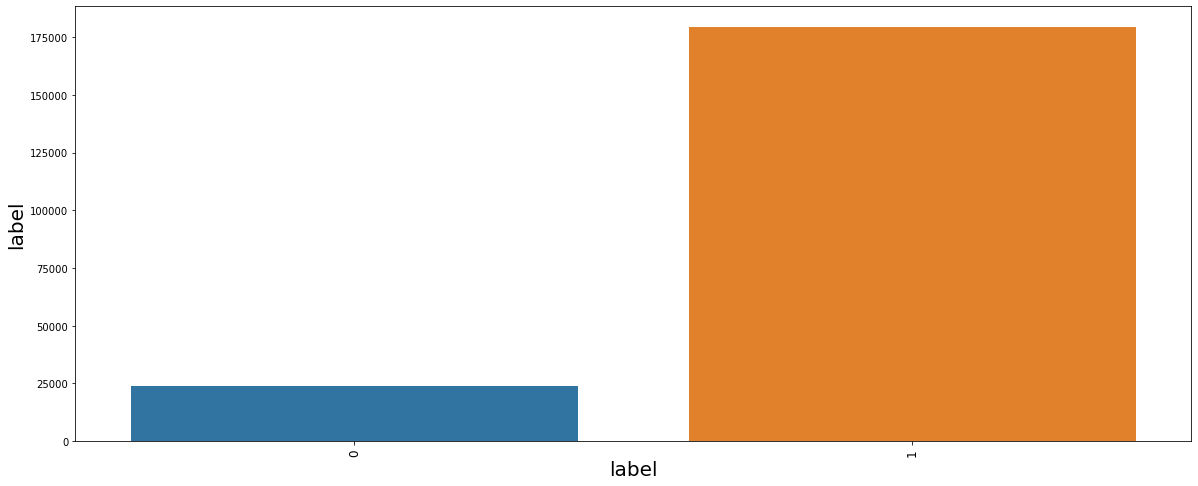

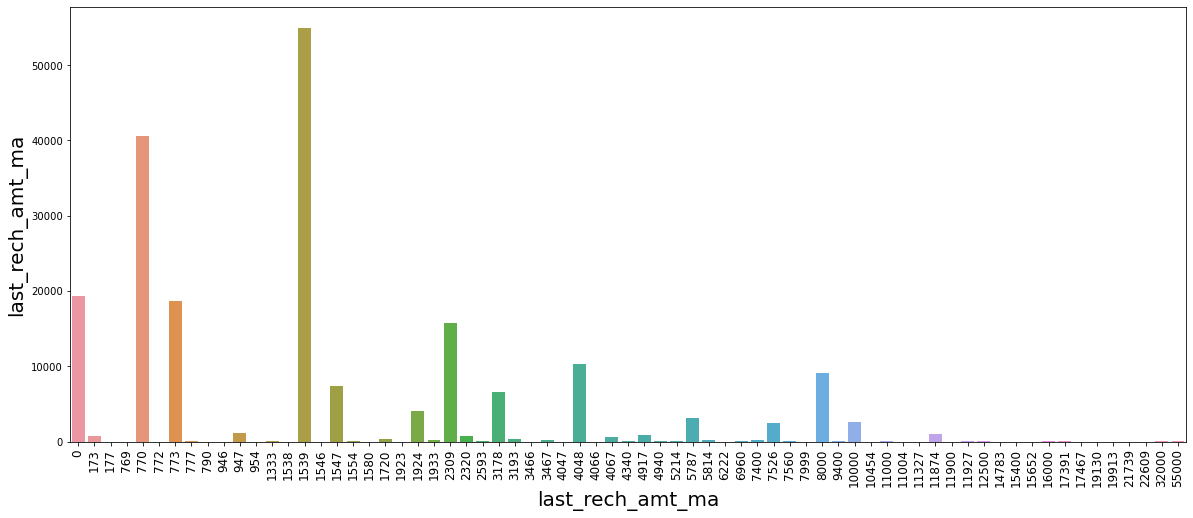

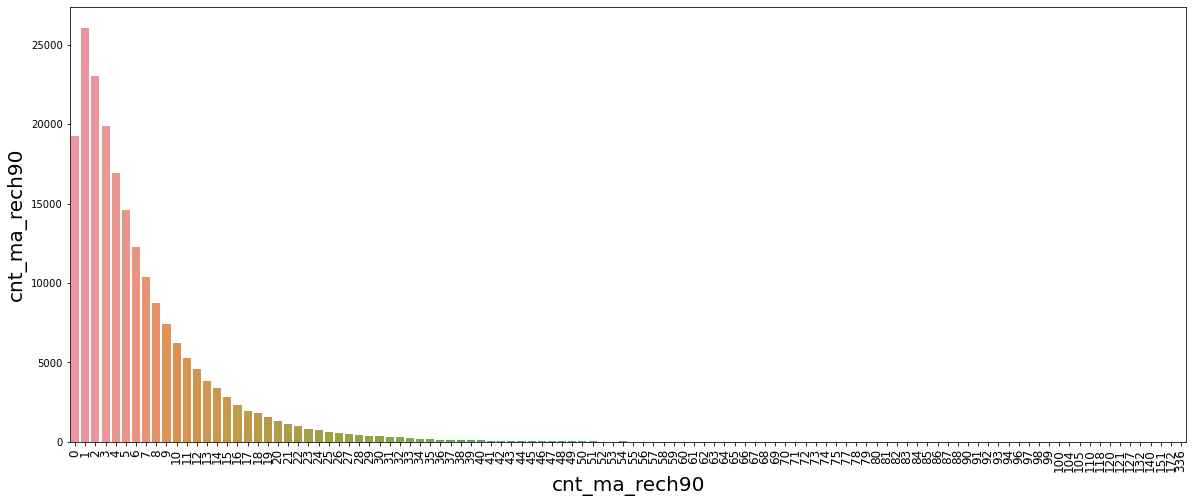

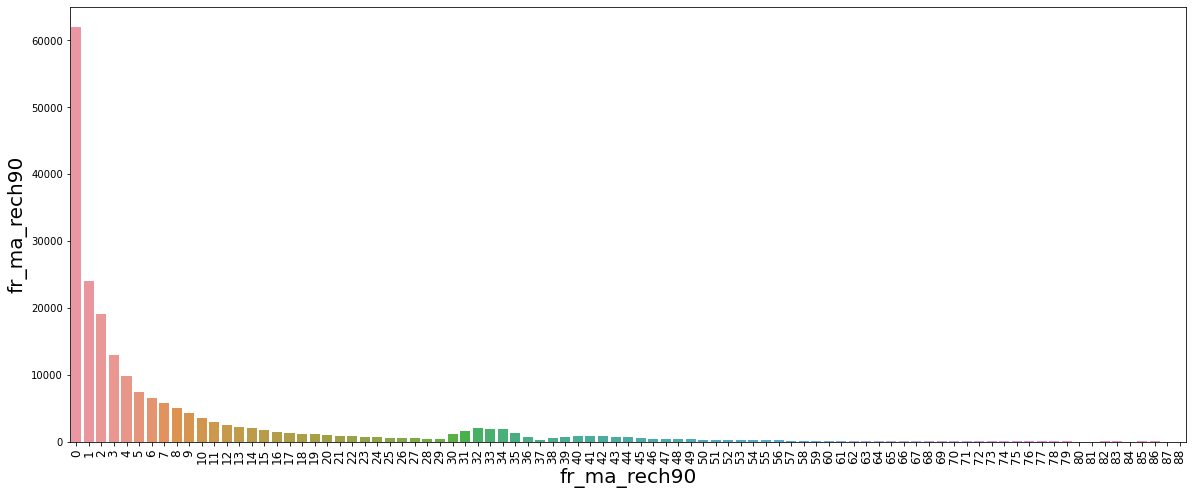

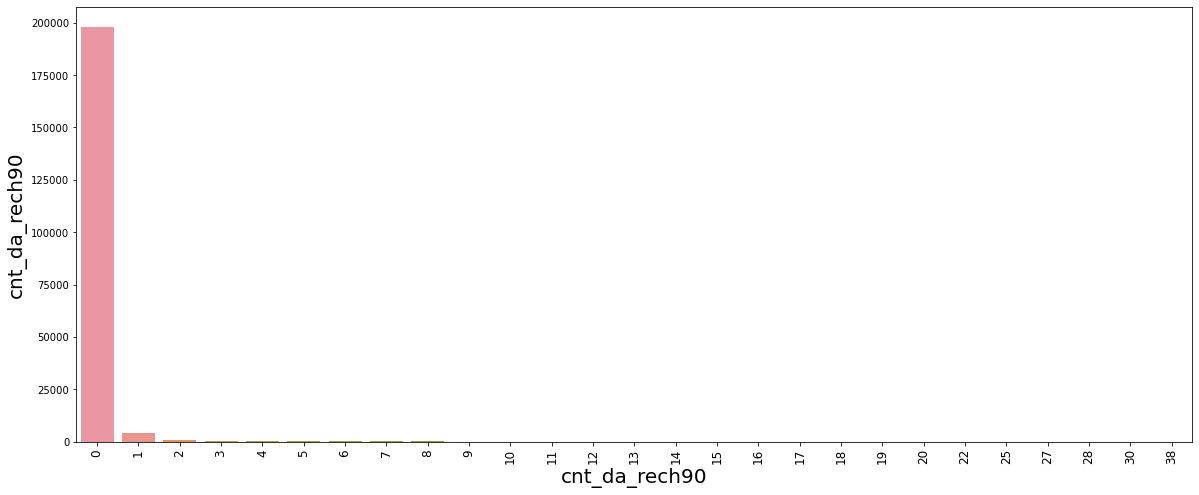

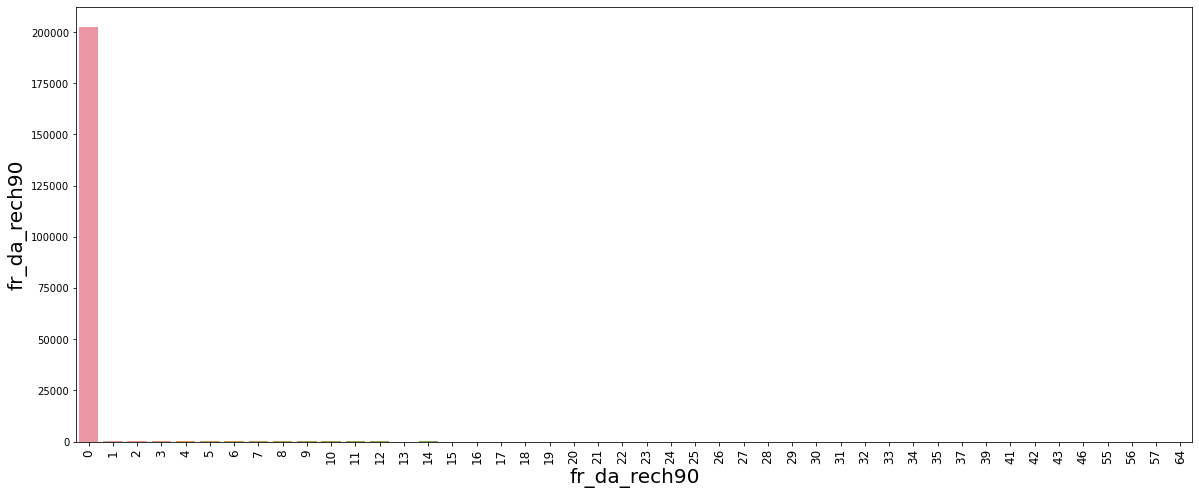

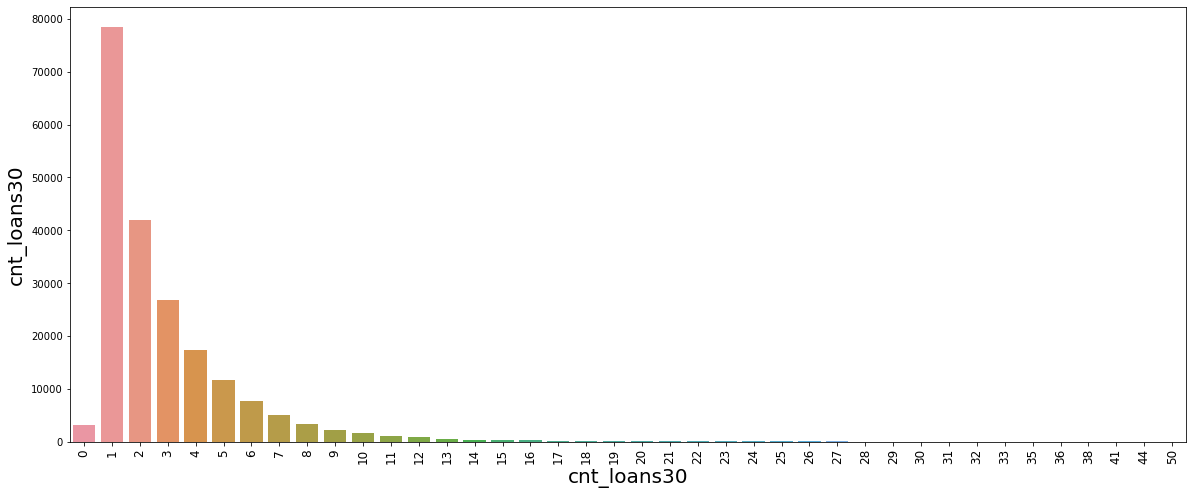

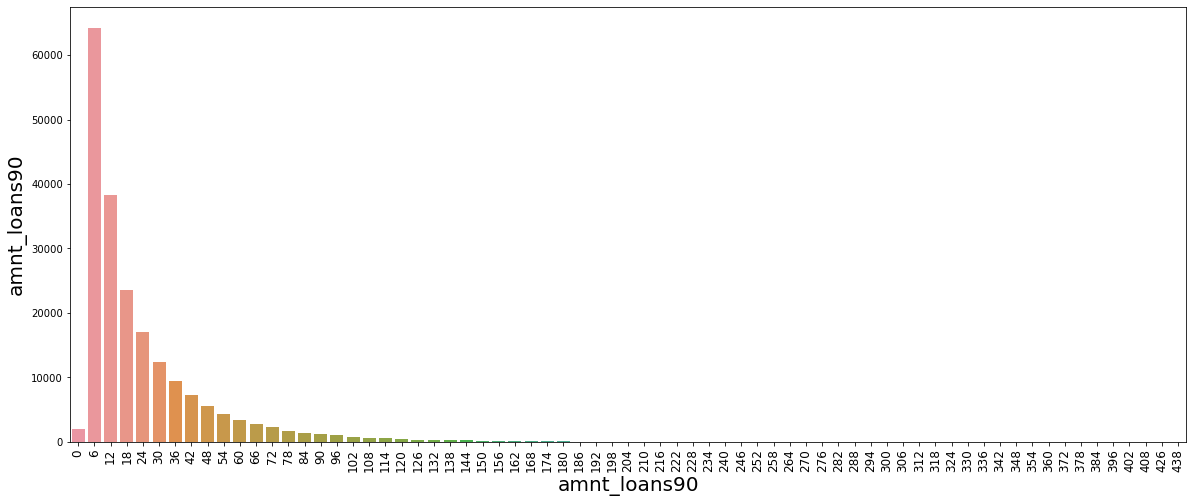

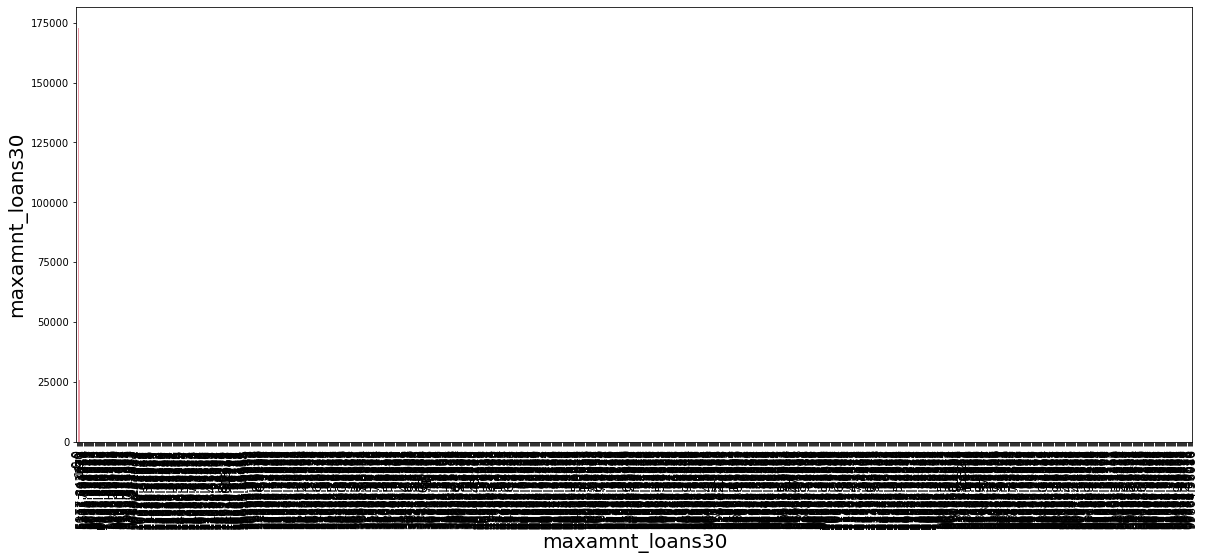

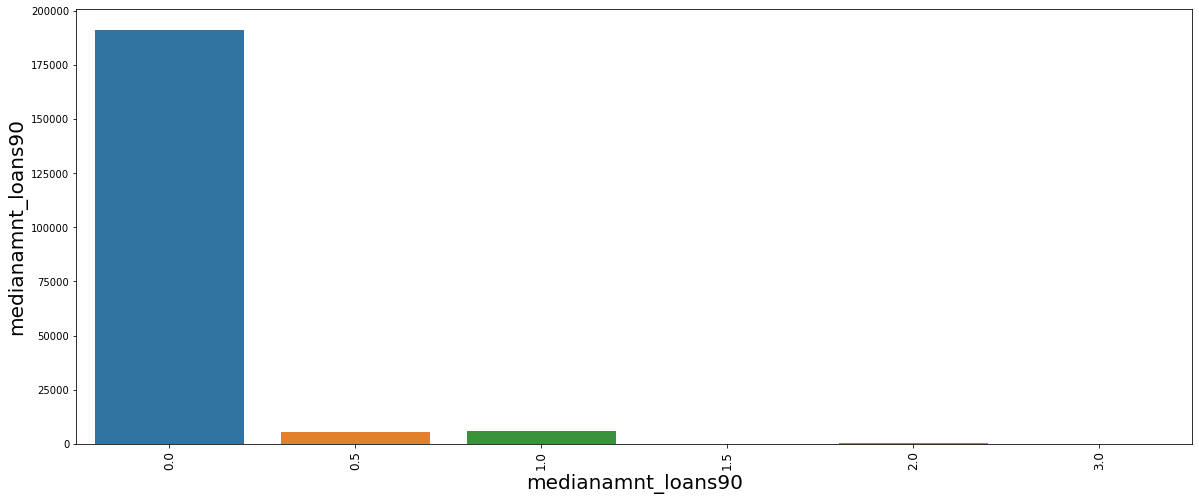

In [37]:
# For loop to display some important features counts in one go after outlier removal...
list=['label', 'last_rech_amt_ma','cnt_ma_rech90', 'fr_ma_rech90','cnt_da_rech90', 'fr_da_rech90',
      'cnt_loans30', 'amnt_loans90','maxamnt_loans30', 'medianamnt_loans90', ]


for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_credit)
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(i,fontsize=20)
    plt.xlabel(f'{i}',fontsize=20)
    plt.show()


array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>],
       [<AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianmarechprebal90'}>,
        <AxesSubplot:title={'center':'cnt_da_rech90'}>],
       [<AxesSubplot:title={'center':'fr_da_rech90'}>,
        <AxesSubplot:title={'center':'cnt_loans30'}>,
        <AxesSubplot:title={'center':'maxamnt_loans30'}>,
        <AxesSubplot:tit

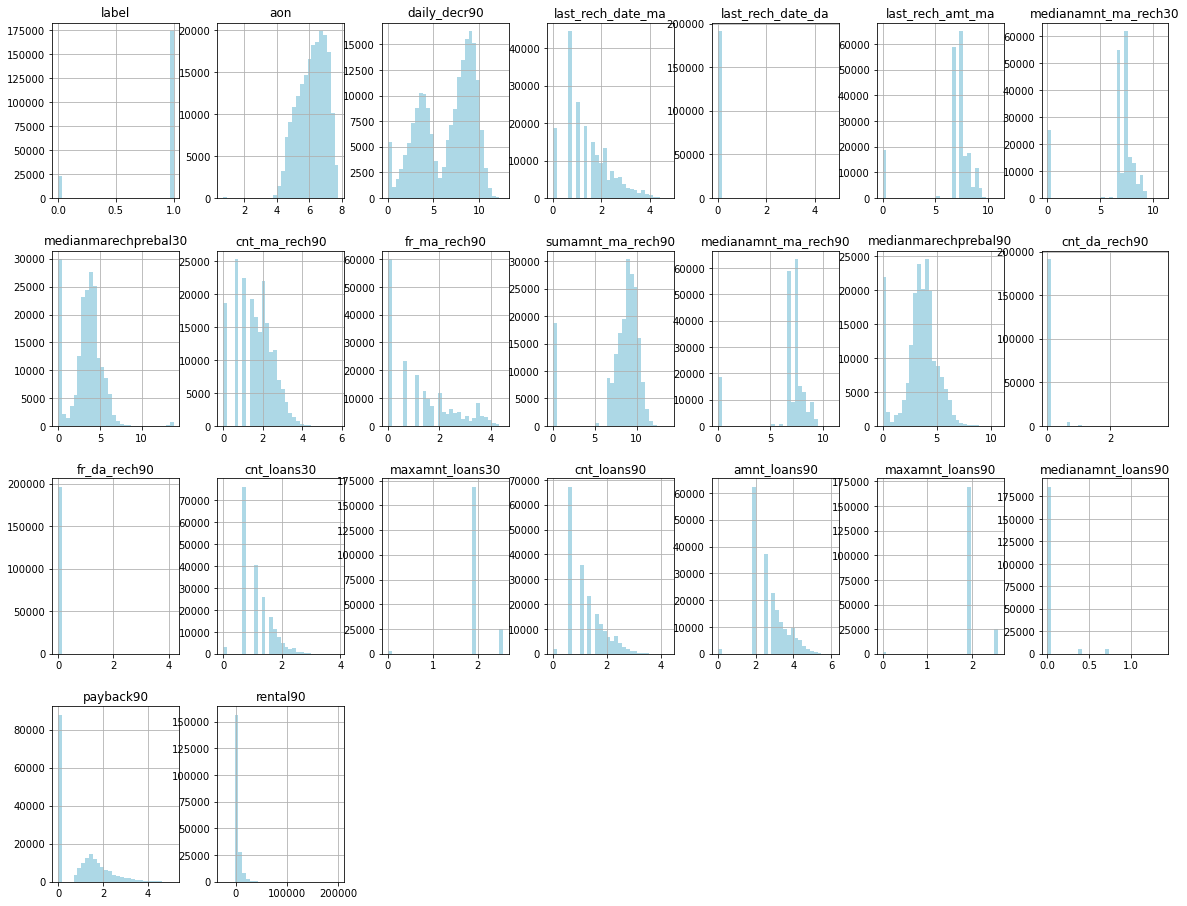

In [38]:
# Checking the Distribution using the histogram plot.
df_clean.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='lightblue') 

**From the above plots it is clear that the data is now normally distributed after outlier treatment and skewness removal.**



In [40]:
# Checking feature information...
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197074 entries, 0 to 209592
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 197074 non-null  int64  
 1   aon                   197074 non-null  float64
 2   daily_decr90          197074 non-null  float64
 3   last_rech_date_ma     197074 non-null  float64
 4   last_rech_date_da     197074 non-null  float64
 5   last_rech_amt_ma      197074 non-null  float64
 6   medianamnt_ma_rech30  197074 non-null  float64
 7   medianmarechprebal30  197074 non-null  float64
 8   cnt_ma_rech90         197074 non-null  float64
 9   fr_ma_rech90          197074 non-null  float64
 10  sumamnt_ma_rech90     197074 non-null  float64
 11  medianamnt_ma_rech90  197074 non-null  float64
 12  medianmarechprebal90  197074 non-null  float64
 13  cnt_da_rech90         197074 non-null  float64
 14  fr_da_rech90          197074 non-null  float64
 15  

((209593-197074)/209593)*100= 5.97%

**After all this cleaning process it is clear that only 5.97% data is removed which was not imaginable for the information these features are providing.**

In [41]:
# checking statistical feature information...
df_clean.describe()

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
count,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,...,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000
mean,0.883145,6.165001,6.501437,1.483485,0.091081,6.708977,6.417064,3.359792,1.629827,1.366985,...,0.022564,0.009193,1.174300,1.994621,1.321503,2.830003,2.007318,0.033006,1.001298,3542.600243
std,0.321248,0.870110,2.924345,0.931668,0.556091,2.288109,2.542768,1.929863,0.885039,1.230499,...,0.150553,0.150559,0.535192,0.326880,0.645018,0.865199,0.289144,0.138901,1.054174,5808.679857
min,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24720.580000
25%,1.000000,5.517453,3.891412,0.693147,0.000000,6.647688,6.647688,2.564949,1.098612,0.000000,...,0.000000,0.000000,0.693147,1.945910,0.693147,1.945910,1.945910,0.000000,0.000000,320.137500
50%,1.000000,6.261492,7.406711,1.386294,0.000000,7.339538,7.339538,3.589059,1.609438,1.098612,...,0.000000,0.000000,1.098612,1.945910,1.098612,2.564949,1.945910,0.000000,1.029619,1379.400000
75%,1.000000,6.872128,8.993642,2.079442,0.000000,7.745003,7.562681,4.448516,2.302585,2.197225,...,0.000000,0.000000,1.609438,1.945910,1.791759,3.433987,1.945910,0.000000,1.717651,4288.900000
max,1.000000,7.800163,12.678046,4.736198,4.753590,10.915107,10.915107,13.814991,5.820083,4.488636,...,3.663562,4.174387,3.931826,2.564949,4.276666,6.084499,2.564949,1.386294,5.150397,200148.110000


In [42]:
# printing cleaned data...
df_clean

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,0,5.609472,8.028178,1.098612,0.000000,7.339538,7.339538,2.140066,1.098612,3.091042,...,0.000000,0.0,1.098612,1.945910,1.098612,2.564949,1.945910,0.0,3.401197,260.13
1,1,6.569481,9.403087,3.044522,0.000000,8.663542,8.663542,4.127779,0.693147,0.000000,...,0.000000,0.0,0.693147,2.564949,0.693147,2.564949,2.564949,0.0,0.000000,3691.26
2,1,6.284134,7.243513,1.386294,0.000000,7.339538,7.339538,4.209457,0.693147,0.000000,...,0.000000,0.0,0.693147,1.945910,0.693147,1.945910,1.945910,0.0,0.000000,900.13
3,1,5.488938,3.101353,3.737670,0.000000,6.854355,0.000000,0.000000,0.693147,0.000000,...,0.000000,0.0,1.098612,1.945910,1.098612,2.564949,1.945910,0.0,0.000000,159.42
4,1,6.854355,5.021373,1.609438,0.000000,7.745003,7.745003,3.401197,2.197225,1.098612,...,0.000000,0.0,2.079442,1.945910,2.079442,3.761200,1.945910,0.0,1.203973,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,6.003887,5.029603,0.693147,0.000000,8.306225,8.064322,4.530554,1.386294,1.098612,...,0.000000,0.0,1.098612,1.945910,1.098612,2.564949,1.945910,0.0,0.693147,1089.19
209589,1,6.981006,3.635901,1.609438,0.000000,6.651572,6.651572,5.089446,1.945910,1.098612,...,0.000000,0.0,1.386294,1.945910,1.386294,2.944439,1.945910,0.0,0.693147,1728.36
209590,1,6.921658,9.384743,1.386294,0.000000,7.339538,7.339538,3.953741,2.484907,1.791759,...,0.000000,0.0,1.609438,2.564949,1.945910,4.007333,2.564949,0.0,1.575536,8893.20
209591,1,7.457609,9.439495,1.098612,3.663562,6.651572,6.651572,5.105945,1.945910,1.609438,...,0.693147,0.0,1.098612,2.564949,1.386294,3.218876,2.564949,0.0,2.442347,984.58


# Bivariant Analysis


**All the categories that is being made to make the visualizations easy are solemnly based on the Description i.e statistical summary of the data plotted above. for instance low comes under(0-25%), average comes under(25-75%) and high comes over 75% of the data values in a given feature**

In [44]:
# Making a copy of cleaned data for the visualization purpose...
df_visual=df_clean.copy()

In [45]:
# Dropping the features which will not be used for visualization purplose...
df_visual.reset_index(inplace = True)
df_visual.drop(['daily_decr90', 'last_rech_date_ma','last_rech_date_da', 'last_rech_amt_ma', 'medianamnt_ma_rech30',
                'medianmarechprebal30', 'fr_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90',
                'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30','maxamnt_loans90', 'medianamnt_loans90',]
               ,axis=1,inplace=True)

In [46]:
# printing the features used for visualization...
df_visual

,index,label,aon,cnt_ma_rech90,sumamnt_ma_rech90,cnt_loans90,amnt_loans90,payback90,rental90
0,0,0,5.609472,1.098612,8.032360,1.098612,2.564949,3.401197,260.13
1,1,1,6.569481,0.693147,8.663542,0.693147,2.564949,0.000000,3691.26
2,2,1,6.284134,0.693147,7.339538,0.693147,1.945910,0.000000,900.13
3,3,1,5.488938,0.693147,6.854355,1.098612,2.564949,0.000000,159.42
4,4,1,6.854355,2.197225,10.064628,2.079442,3.761200,1.203973,1098.90
...,...,...,...,...,...,...,...,...,...
197069,209588,1,6.003887,1.386294,9.250042,1.098612,2.564949,0.693147,1089.19
197070,209589,1,6.981006,1.945910,8.303752,1.386294,2.944439,0.693147,1728.36
197071,209590,1,6.921658,2.484907,9.830540,1.945910,4.007333,1.575536,8893.20
197072,209591,1,7.457609,1.945910,9.794900,1.386294,3.218876,2.442347,984.58


**Feature "rental90": Average main account balance over last 90 days vs Loan Repayment Percentage within 5 days**

In [47]:
# Making a new  feature "Balance_Category" to store the different categories for the rental90 feature to get a better view of the visualtion..
conditions_1=[(df_visual['rental90'] <=0),df_visual['rental90'].between(0,1379),df_visual['rental90'].between(1379,4280),(df_visual['rental90'] > 4280)]
values_1= ['Negative or zero Balance', 'Low Balance', 'Average Balance','High Balance']
df_visual['Balance_Category']=np.select(conditions_1,values_1)

In [48]:
# Printing the new feature...
df_visual['Balance_Category'].value_counts()

Low Balance                 87021
High Balance                49379
Average Balance             49179
Negative or zero Balance    11495
Name: Balance_Category, dtype: int64

**According to the data it is clear that, users having Low balance are more in number and the persons with negative or zero balance are less.**



In [49]:
# Mapping "Balance_Category" feature with precentage value with respect to the label. 
balance_category_percent = pd.crosstab(df_visual['label'],df_visual['Balance_Category']).apply(lambda x: x/x.sum()*100)
balance_category_percent = balance_category_percent.transpose()

In [50]:
# printing values...
balance_category_percent

label,0,1
Balance_Category,,
Average Balance,10.014437,89.985563
High Balance,7.930497,92.069503
Low Balance,12.588915,87.411085
Negative or zero Balance,28.125272,71.874728


**Label 0: defaulter**
    
**Label 1: Non-defaulter**

   



(array([0, 1, 2, 3]),
 [Text(0, 0, 'Average Balance'),
  Text(1, 0, 'High Balance'),
  Text(2, 0, 'Low Balance'),
  Text(3, 0, 'Negative or zero Balance')])

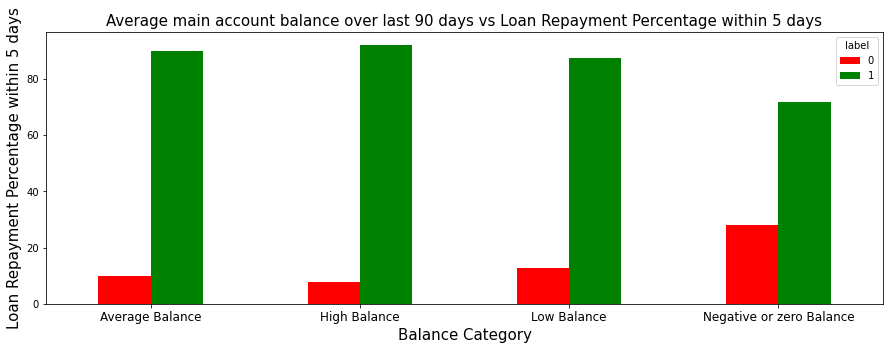

In [52]:
#   Graphical representation of the User's balance along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

balance_category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('Average main account balance over last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Balance Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)

# Conclusion:
From the above Graph and the crosstab table it is clear that:

1) 28% of Users having negative or zero balance are defaulters, which is very high.
2) 10% to 12% Users are defaulters which falls in the category of Average and Low balance category.
3) Users having high balance and are defaulters are very less in number.

**Feature "cnt_loans90": Number of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days**


In [53]:
# Making a new  feature "Loans_Frequency" to store the different categories for the cnt_loans90 feature to get a better view of the visualtion..
conditions_2=[(df_visual['cnt_loans90'] <=0),df_visual['cnt_loans90'].between(0,2),(df_visual['cnt_loans90'] > 2)]
values_2= ['No Loans Taken', 'Average number of loans Taken','Too much loans taken']
df_visual['Loans_Frequency']=np.select(conditions_2,values_2)

In [54]:
df_visual['Loans_Frequency'].value_counts()


Average number of loans Taken    163223
Too much loans taken              31902
No Loans Taken                     1949
Name: Loans_Frequency, dtype: int64


**Users who take average amount of loans more in number.**



In [56]:
# Mapping Loans_Frequency with precentage value with respect to label 
Loans_Frequency_percent = pd.crosstab(df_visual['label'],df_visual['Loans_Frequency']).apply(lambda x: x/x.sum()*100)
Loans_Frequency_percent = Loans_Frequency_percent.transpose()
Loans_Frequency_percent

label,0,1
Loans_Frequency,,
Average number of loans Taken,13.882235,86.117765
No Loans Taken,0.000000,100.000000
Too much loans taken,1.159802,98.840198


(array([0, 1, 2]),
 [Text(0, 0, 'Average number of loans Taken'),
  Text(1, 0, 'No Loans Taken'),
  Text(2, 0, 'Too much loans taken')])

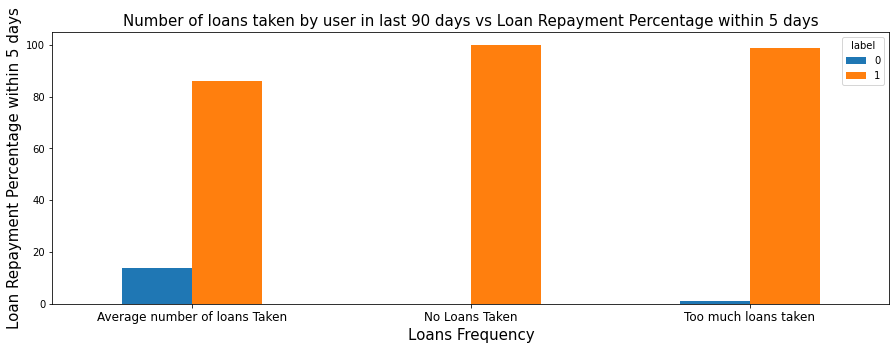

In [57]:
#   Graphical representation of the Loans_Frequency along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

Loans_Frequency_percent.plot(kind='bar',figsize=(15,5))
plt.title('Number of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Loans Frequency',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)

# Conclusion:
From the above graph it is clear that:

1) Users who take more number of loans are non defaulters(i.e 98% of the category) as they repays the loan within the given time i.e 5 days.
2) 14% of the Users are are among the average number of loan taken category are defaulters.

**Feature "sumamnt_ma_rech90":Total amount of recharge in main account over last 90 days (in Indian Rupee) vs Loan Repayment Percentage within 5 days**


In [61]:
# Making a new  feature "Recharge_Amount_Category" to store the different categories for the sumamnt_ma_rech90 feature to get a better view of the visualtion..
conditions_3=[(df_visual['sumamnt_ma_rech90'] <=0),df_visual['sumamnt_ma_rech90'].between(0,12),df_visual['sumamnt_ma_rech90'].between(12,15),(df_visual['sumamnt_ma_rech90'] > 14)]
values_3= ['No Recharge', 'Between 0 and 12(Rupiah)', 'Between 12 and 15(Rupiah)','More than 15']
df_visual['Recharge_Amount_Category']=np.select(conditions_3,values_3)

In [62]:
df_visual['Recharge_Amount_Category'].value_counts()


Between 0 and 12(Rupiah)     178205
No Recharge                   18683
Between 12 and 15(Rupiah)       186
Name: Recharge_Amount_Category, dtype: int64

In [63]:
# Mapping Recharge_Amount_Category with precentage value with respect to label 
Recharge_Amount_Category_percent = pd.crosstab(df_visual['label'],df_visual['Recharge_Amount_Category']).apply(lambda x: x/x.sum()*100)
Recharge_Amount_Category_percent = Recharge_Amount_Category_percent.transpose()
Recharge_Amount_Category_percent

label,0,1
Recharge_Amount_Category,,
Between 0 and 12(Rupiah),8.696726,91.303274
Between 12 and 15(Rupiah),0.537634,99.462366
No Recharge,40.304020,59.695980


(array([0, 1, 2]),
 [Text(0, 0, 'Between 0 and 12(Rupiah)'),
  Text(1, 0, 'Between 12 and 15(Rupiah)'),
  Text(2, 0, 'No Recharge')])

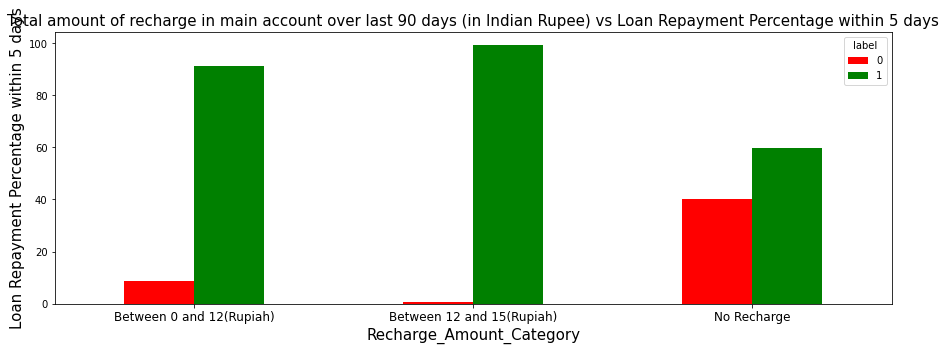

In [64]:
#   Graphical representation of the Recharge_Amount_Category along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.


Recharge_Amount_Category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('Total amount of recharge in main account over last 90 days (in Indian Rupee) vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Recharge_Amount_Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)

# Conclusion:
From the above graph it is clear that:

1) 40 % of the Users who do not even recharged in the 90 days are defaulters only.
2) Users who do very high amount of recharge always pays their loans on time. i.e 98% of them are non defaulters.
3) 34% of the Users who do less amount of recharge are defaulters.

**Feature "payback90":Average payback time in days over last 90 days vs Loan Repayment Percentage within 5 days**


In [65]:
# Making a new  feature "Defaulters_Category" to store the different categories for the payback90 feature to get a better view of the visualtion..
conditions_4=[(df_visual['payback90'] <=5),(df_visual['payback90'] > 5)]
values_4= ['Not Defaulters','Defaulters']
df_visual['Defaulters_Category']=np.select(conditions_4,values_4)

In [66]:
df_visual['Defaulters_Category'].value_counts()


Not Defaulters    196995
Defaulters            79
Name: Defaulters_Category, dtype: int64

In [67]:
# Mapping Defaulters_Category with precentage value with respect to label 
Defaulters_Category_percent = pd.crosstab(df_visual['label'],df_visual['Defaulters_Category']).apply(lambda x: x/x.sum()*100)
Defaulters_Category_percent = Defaulters_Category_percent.transpose()
Defaulters_Category_percent

label,0,1
Defaulters_Category,,
Defaulters,11.392405,88.607595
Not Defaulters,11.685576,88.314424


(array([0, 1]), [Text(0, 0, 'Defaulters'), Text(1, 0, 'Not Defaulters')])

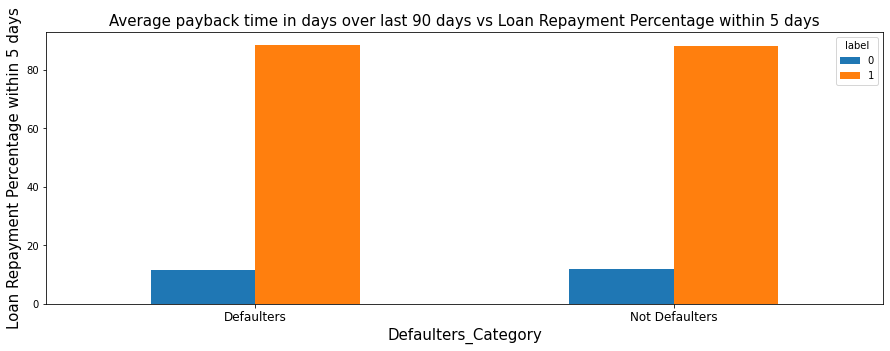

In [68]:
#   Graphical representation of the Defaulters_Category along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.


Defaulters_Category_percent.plot(kind='bar',figsize=(15,5))
plt.title('Average payback time in days over last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Defaulters_Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)

**Feature "amont_loans90": Total amount of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days**


In [69]:
# Making a new  feature "Loan_Amount_Category" to store the different categories for the amnt_loans90 feature to get a better view of the visualtion..
conditions_5=[(df_visual['amnt_loans90'] <=0),df_visual['amnt_loans90'].between(0,1),df_visual['amnt_loans90'].between(1,3),(df_visual['amnt_loans90'] > 3)]
values_5= ['No loans', 'Low Amount', 'Average Amount','High Amount']
df_visual['Loan_Amount_Category']=np.select(conditions_5,values_5)

In [70]:
# Printing the values...
df_visual['Loan_Amount_Category'].value_counts()

Average Amount    122273
High Amount        72852
No loans            1949
Name: Loan_Amount_Category, dtype: int64

**Users who take small loans are more in number**



In [71]:
# Mapping Loan_Amount_Category with precentage value with respect to label 
Loan_Amount_Category_percent = pd.crosstab(df_visual['label'],df_visual['Loan_Amount_Category']).apply(lambda x: x/x.sum()*100)
Loan_Amount_Category_percent = Loan_Amount_Category_percent.transpose()
Loan_Amount_Category_percent

label,0,1
Loan_Amount_Category,,
Average Amount,17.415128,82.584872
High Amount,2.381541,97.618459
No loans,0.000000,100.000000


(array([0, 1, 2]),
 [Text(0, 0, 'Average Amount'),
  Text(1, 0, 'High Amount'),
  Text(2, 0, 'No loans')])

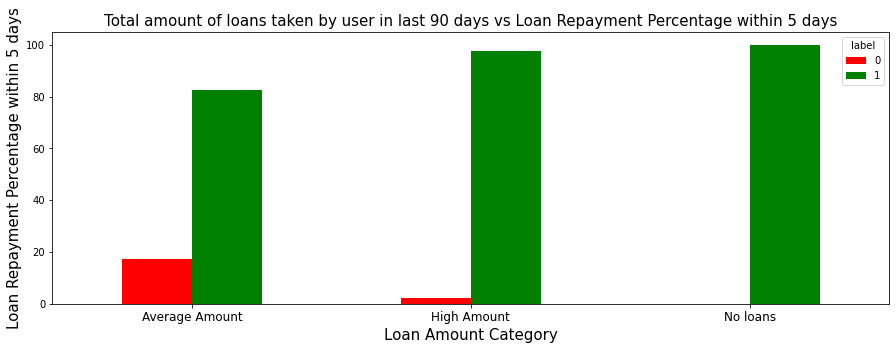

In [72]:
#   Graphical representation of the Loan_Amount_Category along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

Loan_Amount_Category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('Total amount of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Loan Amount Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)

# Conclusion:
From the above graph it is clear that:

1) Users who did not take any loans are non defaulters.
2) Most of the Users(i.e 97%) who take large amount of loans comes under non defaulter category.
3) 17% of the users who take small loans are defaulters.



**Feature "cnt_ma_rech90" :Number of times main account got recharged in last 90 days vs Loan Repayment Percentage within 5 days**


In [73]:
# Making a new  feature "Recharge Frequency" to store the different categories for the cnt_ma_rech90 feature to get a better view of the visualtion..
conditions_6=[(df_visual['cnt_ma_rech90'] <=0),df_visual['cnt_ma_rech90'].between(0,1),df_visual['cnt_ma_rech90'].between(1,3),(df_visual['cnt_ma_rech90'] > 3)]
values_6= ['Not Recharged', 'Low Recharge Frequency', 'Average Recharge Frequency','High Recharge Frequency']
df_visual['Recharge Frequency']=np.select(conditions_6,values_6)

In [74]:
# Printing values...
df_visual['Recharge Frequency'].value_counts()

Average Recharge Frequency    142698
Low Recharge Frequency         25315
Not Recharged                  18683
High Recharge Frequency        10378
Name: Recharge Frequency, dtype: int64

In [75]:
# Mapping Recharge Frequency with precentage value with respect to label 
Recharge_Frequency_percent = pd.crosstab(df_visual['label'],df_visual['Recharge Frequency']).apply(lambda x: x/x.sum()*100)
Recharge_Frequency_percent = Recharge_Frequency_percent.transpose()
Recharge_Frequency_percent

label,0,1
Recharge Frequency,,
Average Recharge Frequency,6.213121,93.786879
High Recharge Frequency,0.645596,99.354404
Low Recharge Frequency,25.937191,74.062809
Not Recharged,40.304020,59.695980


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Average Recharge Frequency'),
  Text(1, 0, 'High Recharge Frequency'),
  Text(2, 0, 'Low Recharge Frequency'),
  Text(3, 0, 'Not Recharged')])

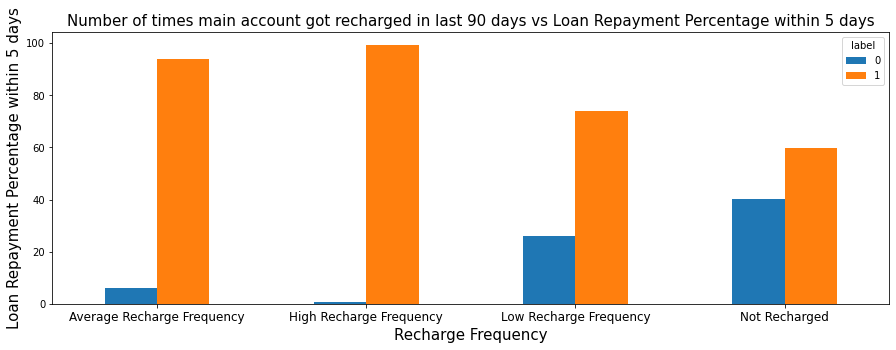

In [76]:
#   Graphical representation of the Recharge Frequency along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

Recharge_Frequency_percent.plot(kind='bar',figsize=(15,5))
plt.title('Number of times main account got recharged in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Recharge Frequency',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)

# Conclusion:
From the above graph it is clear that:

1) Among the Users who have not done a single recharge in 3 months 40% are defaulters.
2) Among the Users who are very frequent in recharging and who always pay their loans on time are more in number i.e 99% of the total category, which is a good news for the company.

**Feature "aon": age on cellular network in days vs Loan Repayment Percentage within 5 days**

In [77]:
# Making a new  feature "Users_Category" to store the different categories for the "aon" feature to get a better view of the visualtion..
conditions_7=[(df_visual['aon'] <2),df_visual['aon'].between(2,5),(df_visual['aon'] > 5)]
values_7= ['New Users','Average Users','Old Users']
df_visual['Users_Category']=np.select(conditions_7,values_7)

In [78]:
# Printing the values...
df_visual['Users_Category'].value_counts()

Old Users        173827
Average Users     23143
New Users           104
Name: Users_Category, dtype: int64

**New Users are very few in number as compared to Old Users which are in a large number**



In [80]:
# Mapping Users_Category with precentage value with respect to label.. 
Users_Category_percent = pd.crosstab(df_visual['label'],df_visual['Users_Category']).apply(lambda x: x/x.sum()*100)
Users_Category_percent = Users_Category_percent.transpose()
Users_Category_percent

label,0,1
Users_Category,,
Average Users,19.418399,80.581601
New Users,32.692308,67.307692
Old Users,10.643341,89.356659


(array([0, 1, 2]),
 [Text(0, 0, 'Average Users'),
  Text(1, 0, 'New Users'),
  Text(2, 0, 'Old Users')])

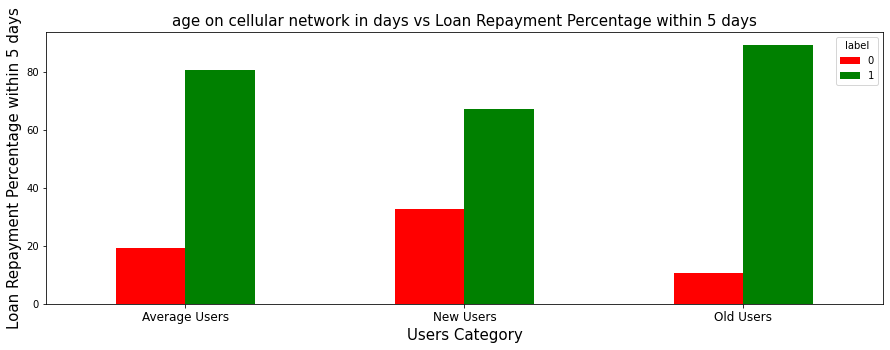

In [81]:
#         Graphical representation of the User's Age on the cellular network along with 
#    their (defaulter or non defaulter) category and their ability to repay the loan amount within 5 days...

Users_Category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('age on cellular network in days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Users Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)

# Conclusion:
From the above graph it is clear that:

1) 32% of the uers who are defaulters are the new users.
2) Old Users are trusted and they are mostly non defaulters.

In [82]:
# Dropping the target value to fit the remaining data into standard scaler 
x2=df_clean.drop(['label'],axis=1)
x2
print(x2.shape)

(197074, 22)


In [83]:
# Setting up the Target value in variable y1.
y1=df_clean['label']
y1.shape

(197074,)

In [86]:
# .....................Importing Important libraries for Classification Models................
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Ensemble Techniques...
# from sklearn.ensemble import GradientBoostingClassifierx apviorn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

ModuleNotFoundError: No module named 'xgboost'

In [93]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,n_jobs=-1,refit=True)
    clf.fit(x_train,y_train)
    print(clf.best_params_)

# Conclusion:

1) 28% of Users having negative or zero balance are defaulters, which is very high.

2) 10% to 12% Users are defaulters which falls in the category of Average and Low balance category.

3) Users having high balance and are defaulters are very less in number.

4) Users who take more number of loans are non defaulters(i.e 98% of the category) as they repays the loan within the given time i.e 5 days.

5) 14% of the Users are are among the average number of loan taken category are defaulters.

6) 40 % of the Users who do not even recharged in the 90 days are defaulters only.

7) Users who do very high amount of recharge always pays their loans on time. i.e 98% of them are non-defaulters.

8) 34% of the Users who do less amount of recharge are defaulters.

9) Users who did not take any loans are non defaulters.

10) Most of the Users(i.e 97%) who take large amount of loans comes under non defaulter category.

11) 17% of the users who take small loans are defaulters.

12) Among the Users who have not done a single recharge in 3 months 40% are defaulters.

13) Among the Users who are very frequent in recharging and who always pay their loans on time are more in number i.e 99% of the total category, which is a good news for the company.

14) 32% of the uers who are defaulters are the new users.

15) Old Users are trusted and they are mostly non defaulters.

**Steps Followed:**

1) Data Analysis.

2) EDA Analysis.

3) Different models are used and machine is trained for each models to find Best Accuracy Score.

4) Best parameters are found using Gridsearch cv and applied to the best models.

5) AUC ROC Curves are made for each model.

6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.

# End of the Document 